<a href="https://colab.research.google.com/github/Yogeshyazzler/Customer-Conversion-Prediction/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/sample_data/train.csv")

In [ ]:
df.shape

(45211, 11)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


# Data Jar

In [ ]:
# Structured - yes
# Right Format
# Missing values
# Duplicates
#outliers

In [ ]:
#Checking data types
df.dtypes

,0
age,int64
job,object
marital,object
education_qual,object
call_type,object
day,int64
mon,object
dur,int64
num_calls,int64
prev_outcome,object


In [ ]:
#checking null values
df.isna().sum()

,0
age,0
job,0
marital,0
education_qual,0
call_type,0
day,0
mon,0
dur,0
num_calls,0
prev_outcome,0


In [ ]:
#checking duplicates count
df.duplicated().sum()

np.int64(6)

In [ ]:
#dropping the duplicates
df=df.drop_duplicates()

In [ ]:
#checking the dataset output values
df['y'].value_counts()

,count
y,
no,39916
yes,5289


In [ ]:
#outlier
#since we have more categorical columns we can do outlier detection after EDA.

# Exploratory Data Analysis (EDA):

In [ ]:
#Mapping the categorical outcome value into numerical value

df['y'] = df['y'].map({'no':0, 'yes':1})

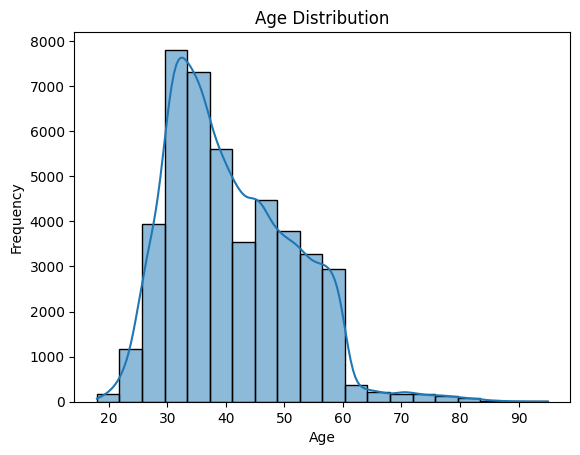

In [ ]:
#From this chart we can clearly indentify the maximum customer range false between 30-40
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


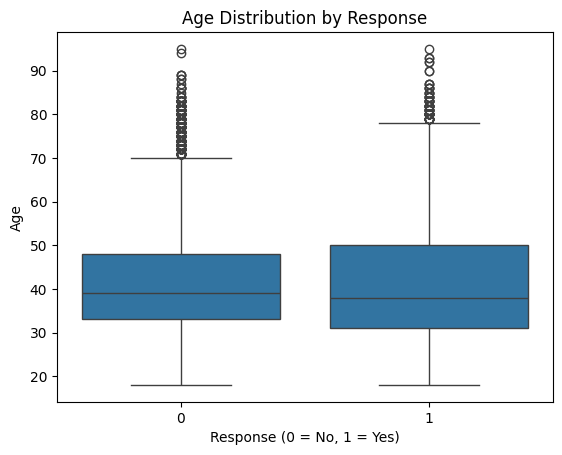

In [ ]:
#customer covertion age
sns.boxplot(x=df['y'], y=df['age'])
plt.title("Age Distribution by Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

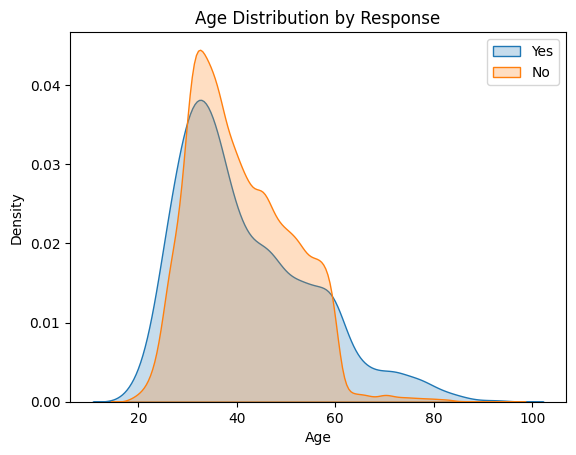

In [ ]:
#Age Distribution by Response
sns.kdeplot(df[df['y']==1]['age'], label='Yes', shade=True)
sns.kdeplot(df[df['y']==0]['age'], label='No', shade=True)
plt.title('Age Distribution by Response')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
#Job

df['job'].value_counts()

,count
job,
blue-collar,9730
management,9457
technician,7596
admin.,5170
services,4153
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


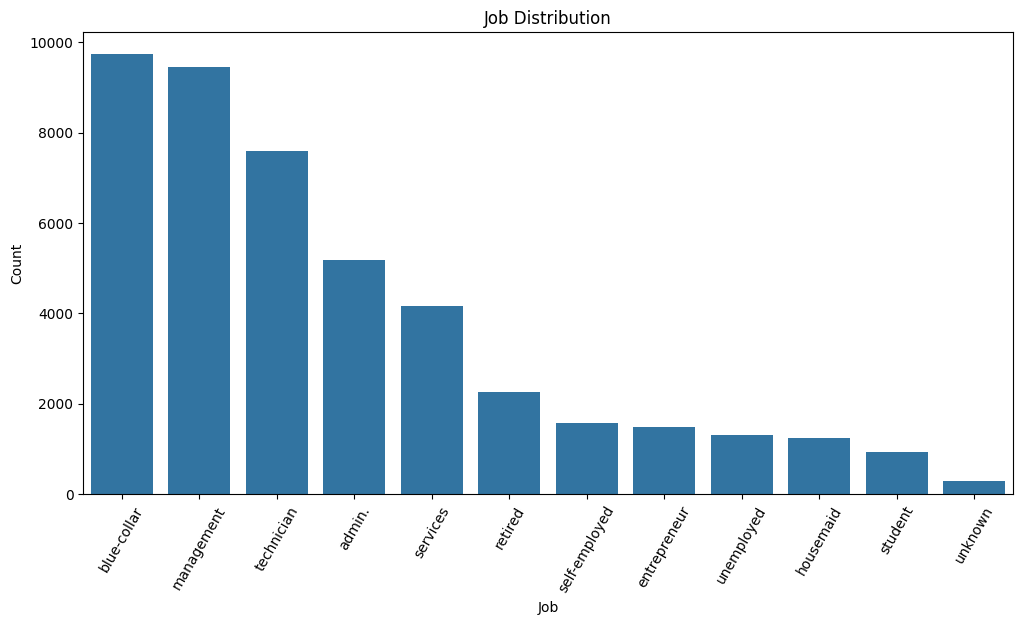

In [ ]:
#Job Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=df['job'], order=df['job'].value_counts().index)
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

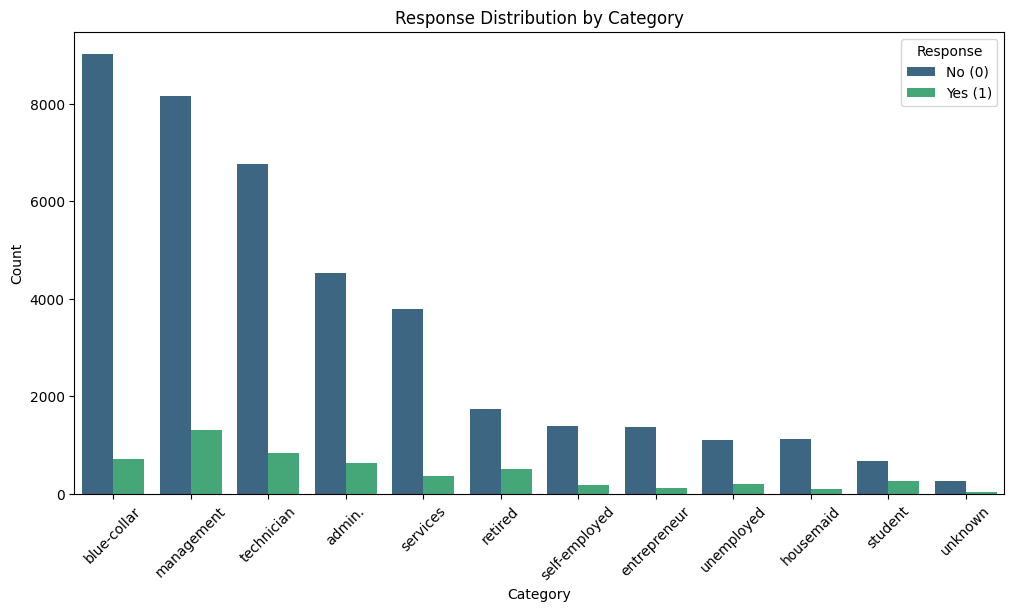

In [ ]:
#Response Distribution by Category
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x=df['job'], hue=df['y'], order=df['job'].value_counts().index, palette="viridis")

plt.title("Response Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate for readability
plt.legend(title="Response", labels=["No (0)", "Yes (1)"])
plt.show()

#In chart we can clearly the peoples job and their conversion


In [ ]:
df['marital'].value_counts()

,count
marital,
married,27210
single,12788
divorced,5207


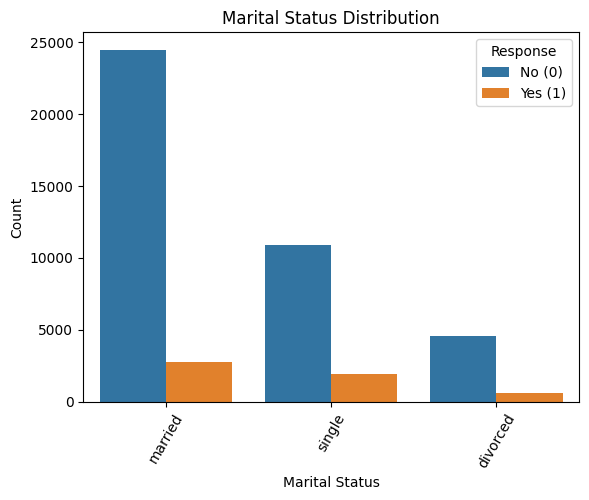

In [ ]:
#Marital Status Distribution
sns.countplot(x=df['marital'],hue=df['y'], order=df['marital'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title="Response", labels=["No (0)", "Yes (1)"])
plt.show()

#we can clearly identify the convertion variations in the martial columns

In [ ]:
df['education_qual'].value_counts()

,count
education_qual,
secondary,23199
tertiary,13299
primary,6850
unknown,1857


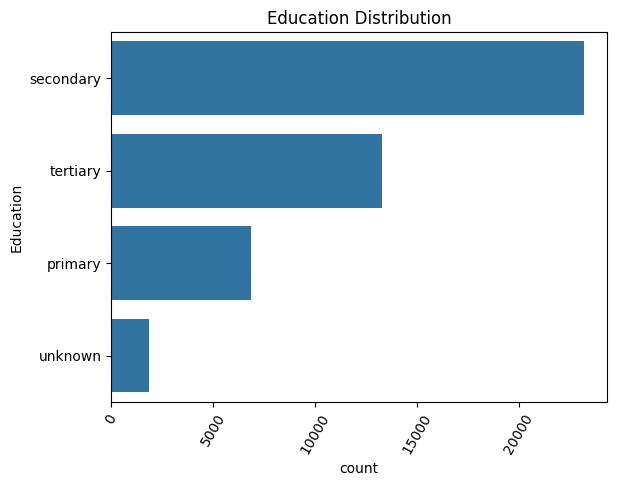

In [ ]:
sns.countplot(y=df['education_qual'], order=df['education_qual'].value_counts().index)
plt.title('Education Distribution')
plt.xlabel('count')
plt.ylabel('Education')
plt.xticks(rotation=60)
plt.show()


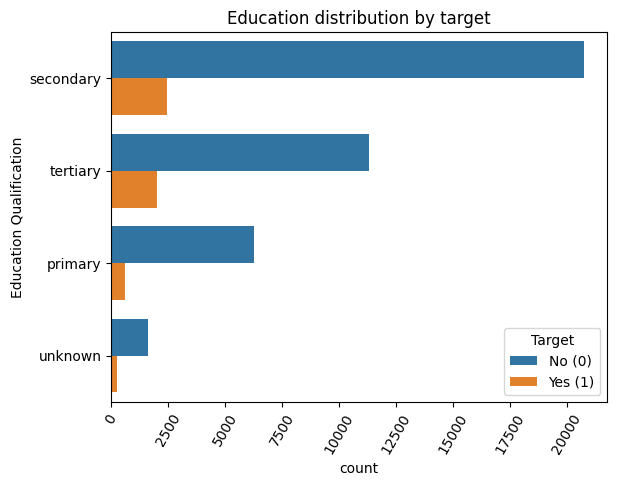

In [ ]:
sns.countplot(y=df['education_qual'], hue=df['y'], order=df['education_qual'].value_counts().index)
plt.title('Education distribution by target')
plt.ylabel('Education Qualification')
plt.xlabel('count')
plt.xticks(rotation=60)
plt.legend(title="Target", labels=["No (0)", "Yes (1)"])
plt.show()

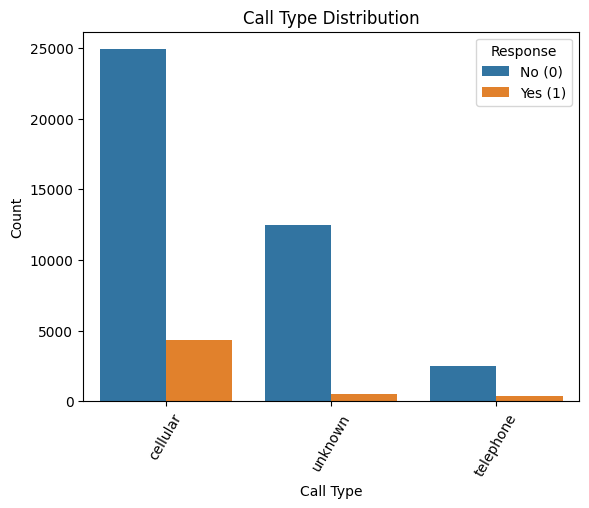

In [ ]:
#call_type

sns.countplot(x=df['call_type'],hue=df['y'], order=df['call_type'].value_counts().index)
plt.title('Call Type Distribution')
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title="Response", labels=["No (0)", "Yes (1)"])
plt.show()

In [ ]:
#Day Column

df['day'].value_counts().sort_index().head(),df.groupby('day')['y'].value_counts().head()

(day
 1     322
 2    1292
 3    1079
 4    1445
 5    1910
 Name: count, dtype: int64,
 day  y
 1    0     232
      1      90
 2    0    1110
      1     182
 3    0     901
 Name: count, dtype: int64)

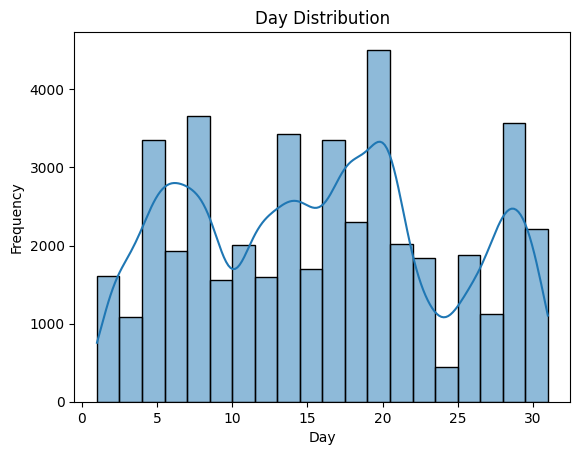

In [ ]:
#Day Distribution
sns.histplot(df['day'], bins=20, kde=True)
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Day Distribution')
plt.show()

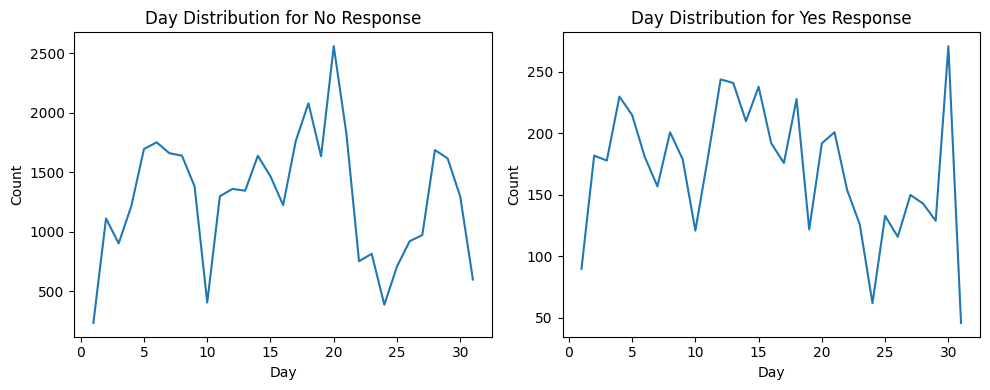

In [ ]:
#Day Distribution for No Response
fig, axes = plt.subplots(1,2, figsize=(10,4))
df_day_0 = df[df['y'] == 0].groupby('day').size().reset_index(name='count')
sns.lineplot(x='day',y='count', data=df_day_0, ax=axes[0])
axes[0].set_title('Day Distribution for No Response')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count')

#Day Distribution for Yes Response
df_day_1 = df[df['y'] == 1].groupby('day').size().reset_index(name='count')
sns.lineplot(x='day',y='count', data=df_day_1, ax=axes[1])
axes[1].set_title('Day Distribution for Yes Response')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



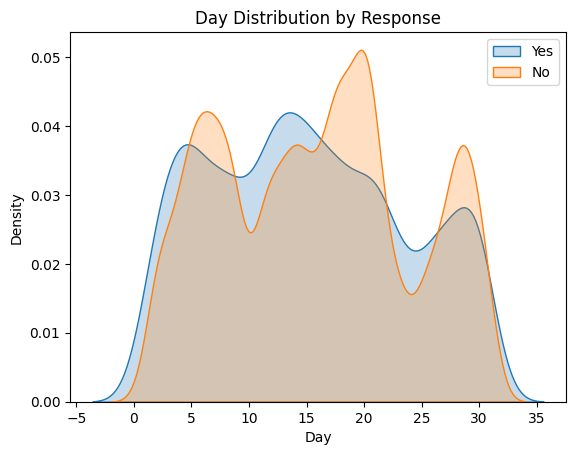

In [ ]:
#ay Distribution by Response
sns.kdeplot(df[df['y']==1]['day'], label='Yes', shade=True)
sns.kdeplot(df[df['y']==0]['day'], label='No', shade=True)
plt.title('Day Distribution by Response')
plt.xlabel('Day')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
#Month

df['mon'].value_counts()

,count
mon,
may,13765
jul,6894
aug,6245
jun,5339
nov,3970
apr,2932
feb,2649
jan,1403
oct,738


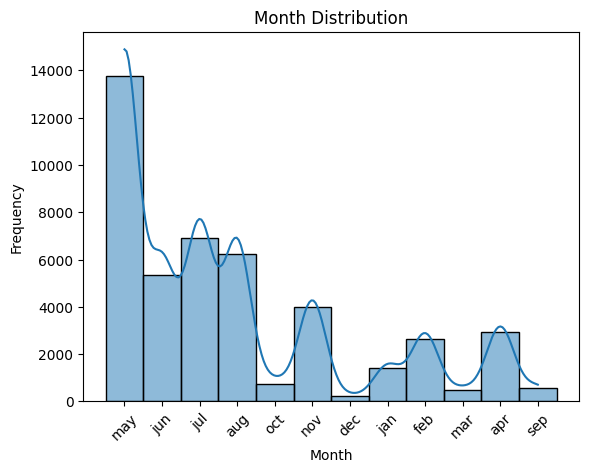

In [ ]:
#Month Distribution
# Plot histogram
sns.histplot(df['mon'], bins=20, kde=True)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Month Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

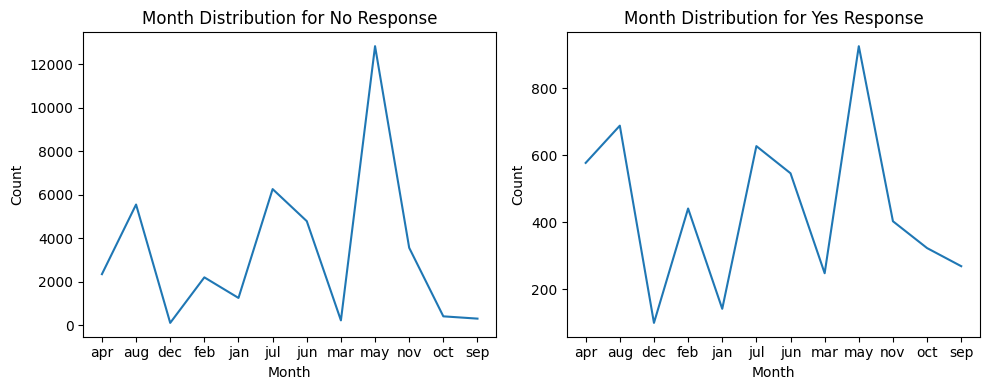

In [ ]:
df_mon_1 = df[df['y']==1].groupby('mon').size().reset_index(name='count')
df_mon_0 = df[df['y']==0].groupby('mon').size().reset_index(name='count')

# Create subplots
#Month Distribution for No Response
fig,axes = plt.subplots(1,2,figsize=(10,4))
sns.lineplot(x='mon',y='count',data=df_mon_0,ax=axes[0])
axes[0].set_title('Month Distribution for No Response')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

#Month Distribution for Yes Response
sns.lineplot(x='mon',y='count',data=df_mon_1,ax=axes[1])
axes[1].set_title('Month Distribution for Yes Response')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

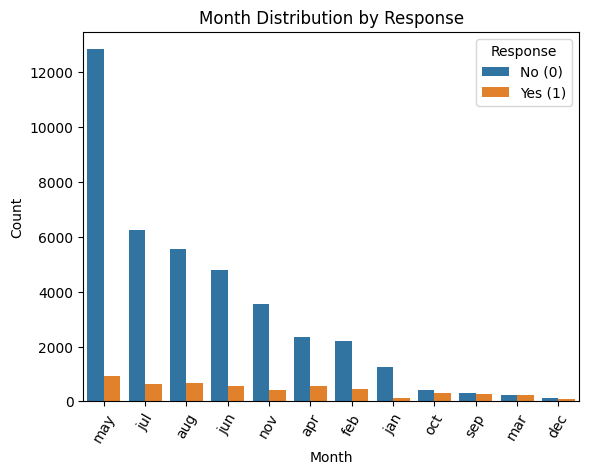

In [ ]:
#Month Distribution by Response
sns.countplot(x=df['mon'], hue=df['y'], order=df['mon'].value_counts().index)
plt.title('Month Distribution by Response')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title="Response", labels=["No (0)", "Yes (1)"])
plt.show()

In [ ]:
#dur column

df.groupby('y')['dur'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
0,39916.0,221.199870,207.393363,0.0,95.0,164.0,279.0,4918.0
1,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


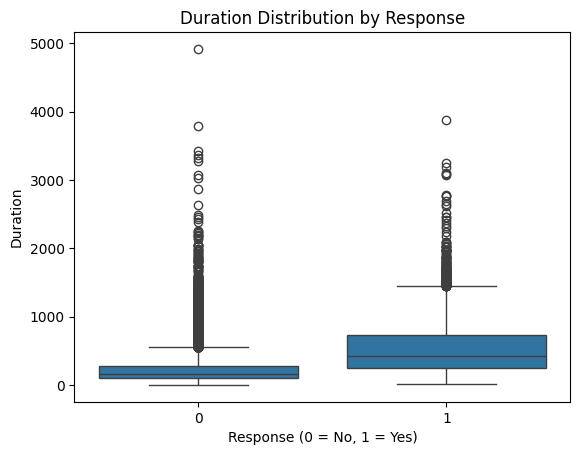

In [ ]:
#Duration Distribution by Response
sns.boxplot(x=df['y'], y=df['dur'])
plt.title("Duration Distribution by Response")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Duration")
plt.show()

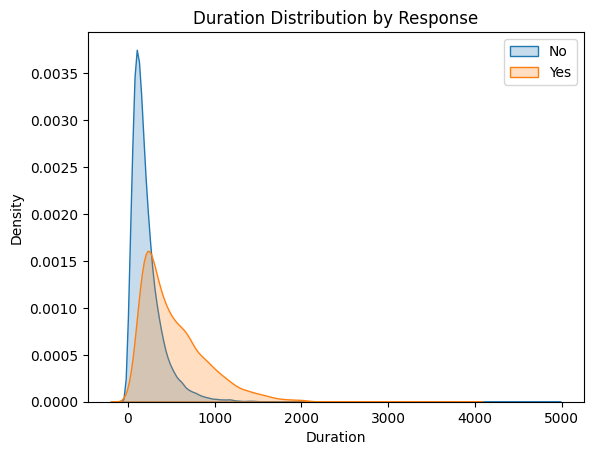

In [ ]:
#Duration Distribution by Response
sns.kdeplot(df[df['y']==0]['dur'], label='No', shade=True)
sns.kdeplot(df[df['y']==1]['dur'], label='Yes', shade=True)
plt.title('Duration Distribution by Response')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.legend()
plt.show()

#Long duration = convertion

In [ ]:
#num_calls
df['num_calls'].value_counts()

,count
num_calls,
1,17542
2,12503
3,5521
4,3520
5,1764
6,1291
7,735
8,540
9,327


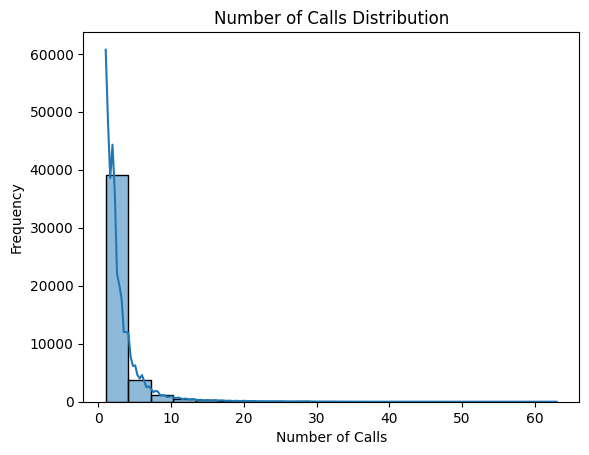

In [ ]:
#Number of Calls Distribution
sns.histplot(df['num_calls'], bins=20, kde=True)
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.title('Number of Calls Distribution')
plt.show()

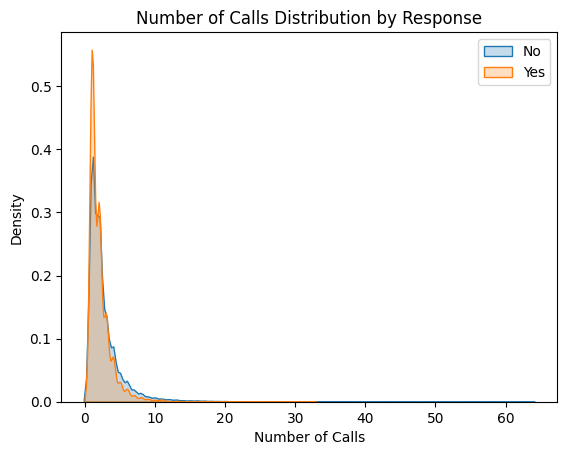

In [ ]:
#Number of Calls Distribution by Response
sns.kdeplot(df[df['y']==0]['num_calls'], label='No', shade=True)
sns.kdeplot(df[df['y']==1]['num_calls'], label='Yes', shade=True)
plt.title('Number of Calls Distribution by Response')
plt.xlabel('Number of Calls')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
df['prev_outcome'].value_counts()

,count
prev_outcome,
unknown,36953
failure,4901
other,1840
success,1511


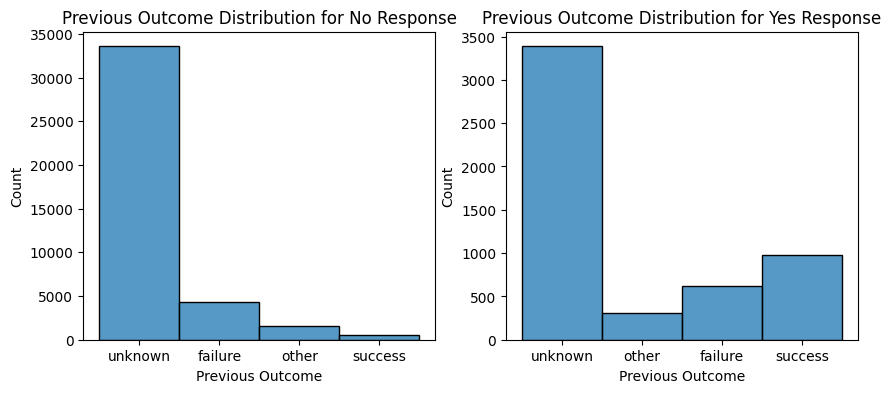

In [ ]:
#Previous Outcome Distribution for No Response
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.histplot(df[df['y']==0]['prev_outcome'], ax=axes[0])
axes[0].set_title('Previous Outcome Distribution for No Response')
axes[0].set_xlabel('Previous Outcome')

#Previous Outcome Distribution for Yes Response
sns.histplot(df[df['y']==1]['prev_outcome'], ax=axes[1])
axes[1].set_title('Previous Outcome Distribution for Yes Response')
axes[1].set_xlabel('Previous Outcome')
plt.show()

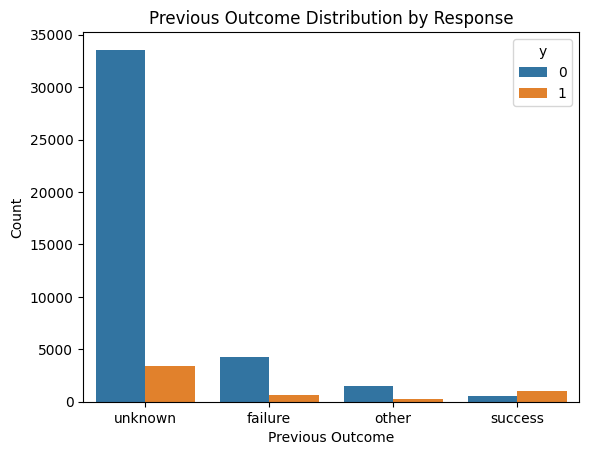

In [ ]:
#Previous Outcome Distribution by Response
sns.countplot(x=df['prev_outcome'], hue=df['y'], order=df['prev_outcome'].value_counts().index)
plt.title('Previous Outcome Distribution by Response')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.show()

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education_qual,object
call_type,object
day,int64
mon,object
dur,int64
num_calls,int64
prev_outcome,object


#Statistical Analysis


In [ ]:
# categorical + catgorical = chi square
# categorical + Numerical  = Annova
# Numerical + Numerical    = corelation

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education_qual,object
call_type,object
day,int64
mon,object
dur,int64
num_calls,int64
prev_outcome,object


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['job'], df['y'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"chi-square statistic: {chi2}")
print(f"p-value: {p}")

if p < 0.05:
    print("There is a significant association between job and y.")
else:
    print("There is no significant association between job and y.")

chi-square statistic: 835.8388743983467
p-value: 3.8075414928462055e-172
There is a significant association between job and y.


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['marital'], df['y'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"chi-square statistic: {chi2}")
print(f"p-value: {p}")

if p < 0.05:
    print("There is a significant association between marital and y.")
else:
    print("There is no significant association between marital and y.")

chi-square statistic: 196.5079649127884
p-value: 2.1322474032039977e-43
There is a significant association between marital and y.


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['education_qual'], df['y'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"chi-square statistic: {chi2}")
print(f"p-value: {p}")

if p < 0.05:
    print("There is a significant association between education_qual and y.")
else:
    print("There is no significant association between education_qual and y.")

chi-square statistic: 238.932965936814
p-value: 1.6190122654475357e-51
There is a significant association between education_qual and y.


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['mon'], df['y'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"chi-square statistic: {chi2}")
print(f"p-value: {p}")

if p < 0.05:
    print("There is a significant association between mon and y.")
else:
    print("There is no significant association between mon and y.")

chi-square statistic: 3061.2525527800726
p-value: 0.0
There is a significant association between mon and y.


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['call_type'], df['y'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"chi-square statistic: {chi2}")
print(f"p-value: {p}")

if p < 0.05:
    print("There is a significant association between call_type and y.")
else:
    print("There is no significant association between call_type and y.")

chi-square statistic: 1035.4945851731852
p-value: 1.3970366812211737e-225
There is a significant association between call_type and y.


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['prev_outcome'], df['y'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"chi-square statistic: {chi2}")
print(f"p-value: {p}")

if p < 0.05:
    print("There is a significant association between prev_outcome and y.")
else:
    print("There is no significant association between prev_outcome and y.")

chi-square statistic: 4390.693623099514
p-value: 0.0
There is a significant association between prev_outcome and y.


In [ ]:
from scipy.stats import ttest_ind

group_0 = df[df['y'] == 0]['dur']
group_1 = df[df['y'] == 1]['dur']

# Perform t_test

t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)
print(f"T-Test P-Value: {p_value}")

if p_value < 0.05:
    print("Significant difference in dur between Target 0 & 1.")
else:
    print("No significant difference in dur between Target 0 & 1.")


T-Test P-Value: 0.0
Significant difference in dur between Target 0 & 1.


In [ ]:
from scipy.stats import ttest_ind

group_0 = df[df['y'] == 0]['day']
group_1 = df[df['y'] == 1]['day']

# Perform t_test

t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)
print(f"T-Test P-Value: {p_value}")

if p_value < 0.05:
    print("Significant difference in day between Target 0 & 1.")
else:
    print("No significant difference in day between Target 0 & 1.")


T-Test P-Value: 3.353116390988029e-09
Significant difference in day between Target 0 & 1.


In [ ]:
from scipy.stats import ttest_ind

# Example: Numerical column = Age, Categorical column = Target (0, 1)
group_0 = df[df['y'] == 0]['num_calls']
group_1 = df[df['y'] == 1]['num_calls']

# Perform t_test

t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)
print(f"T-Test P-Value: {p_value}")

if p_value < 0.05:
    print("Significant difference in num_calls between Target 0 & 1.")
else:
    print("No significant difference in num_calls between Target 0 & 1.")

T-Test P-Value: 3.5948156012653677e-112
Significant difference in num_calls between Target 0 & 1.


# Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns
encoder.fit(df[['job']])
encoded_array = encoder.transform(df[['job']])

# Convert NumPy array to DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['job']))

# Reset index to match original df
encoded_df.index = df.index

# Concatenate encoded columns with original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
df.drop(columns='job', inplace=True)

# Display the first few rows
print(df.head())



   age  marital education_qual call_type  day  mon  dur  num_calls  \
0   58  married       tertiary   unknown    5  may  261          1   
1   44   single      secondary   unknown    5  may  151          1   
2   33  married      secondary   unknown    5  may   76          1   
3   47  married        unknown   unknown    5  may   92          1   
4   33   single        unknown   unknown    5  may  198          1   

  prev_outcome  y  ...  job_entrepreneur  job_housemaid  job_management  \
0      unknown  0  ...               0.0            0.0             1.0   
1      unknown  0  ...               0.0            0.0             0.0   
2      unknown  0  ...               1.0            0.0             0.0   
3      unknown  0  ...               0.0            0.0             0.0   
4      unknown  0  ...               0.0            0.0             0.0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0          0.0                0.0           0.0 

In [ ]:
with open('job_encoder.pkl','wb') as f:
  pickle.dump(encoder,f)

In [ ]:
#marital column encoding
df['marital'] = df['marital'].map({'divorced':0,'single':1, 'married':2})
df['marital'].unique()

array([2, 1, 0])

In [ ]:
df.dtypes

,0
age,int64
marital,int64
education_qual,object
call_type,object
day,int64
mon,object
dur,int64
num_calls,int64
prev_outcome,object
y,int64


In [ ]:
#education_qual column encoding
df['education_qual']=df['education_qual'].map({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3})
df['education_qual'].unique()

array([3, 2, 0, 1])

In [ ]:
#call_type column encoding
df['call_type'] = df['call_type'].map({'unknown':0,'telephone':1, 'cellular':2})
df['call_type'].unique()


array([0, 2, 1])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns
encoder.fit(df[['mon']])
encoded_array_mon = encoder.transform(df[['mon']])

# Convert NumPy array to DataFrame with proper column names
encoded_df_mon = pd.DataFrame(encoded_array_mon, columns=encoder.get_feature_names_out(['mon']))

# Reset index to match original df
encoded_df_mon.index = df.index

# Concatenate encoded columns with original DataFrame
df = pd.concat([df, encoded_df_mon], axis=1)

# Drop the original categorical columns
df.drop(columns='mon', inplace=True)

# Display the first few rows
print(df.head())

   age  marital  education_qual  call_type  day  dur  num_calls prev_outcome  \
0   58        2               3          0    5  261          1      unknown   
1   44        1               2          0    5  151          1      unknown   
2   33        2               2          0    5   76          1      unknown   
3   47        2               0          0    5   92          1      unknown   
4   33        1               0          0    5  198          1      unknown   

   y  job_blue-collar  ...  mon_dec  mon_feb  mon_jan  mon_jul  mon_jun  \
0  0              0.0  ...      0.0      0.0      0.0      0.0      0.0   
1  0              0.0  ...      0.0      0.0      0.0      0.0      0.0   
2  0              0.0  ...      0.0      0.0      0.0      0.0      0.0   
3  0              1.0  ...      0.0      0.0      0.0      0.0      0.0   
4  0              0.0  ...      0.0      0.0      0.0      0.0      0.0   

   mon_mar  mon_may  mon_nov  mon_oct  mon_sep  
0      0.0      1.0

In [ ]:
with open('month_encoder.pkl','wb') as f:
  pickle.dump(encoder,f)

In [ ]:
df['prev_outcome'].value_counts()

,count
prev_outcome,
unknown,36953
failure,4901
other,1840
success,1511


In [ ]:
from sklearn.preprocessing import LabelEncoder

#prev_outcome column encoding
prev_outcome_encoder = LabelEncoder()
df['prev_outcome'] = prev_outcome_encoder.fit_transform(df['prev_outcome'])
df['prev_outcome'].unique()

array([3, 0, 1, 2])

In [ ]:
with open ('prev_outcome_encoder.pkl','wb') as f:
  pickle.dump(prev_outcome_encoder,f)

In [ ]:
#checking all the columns
df.head(3)

,age,marital,education_qual,call_type,day,dur,num_calls,prev_outcome,y,job_blue-collar,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
0,58,2,3,0,5,261,1,3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44,1,2,0,5,151,1,3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33,2,2,0,5,76,1,3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['age', 'marital', 'education_qual', 'call_type', 'day', 'dur',
       'num_calls', 'prev_outcome', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep'],
      dtype='object')

In [ ]:
df.dtypes

,0
age,int64
marital,int64
education_qual,int64
call_type,int64
day,int64
dur,int64
num_calls,int64
prev_outcome,int64
y,int64
job_blue-collar,float64


#checking Skewness in data

In [ ]:
df.skew().sort_values(ascending=False)

,0
mon_dec,14.431109
job_unknown,12.408805
mon_mar,9.580509
mon_sep,8.665577
mon_oct,7.633731
job_student,6.724370
job_housemaid,5.786715
job_unemployed,5.632477
mon_jan,5.408717
job_entrepreneur,5.237936


In [ ]:
#skewness subplots function
def plot(df,column):
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column) #displot

  plt.subplot(1,3,2)
  sns.histplot(df, x=column,kde=True,bins=30,color="red")
  plt.title("histplot for"+" "+column) #histplot

  plt.subplot(1,3,3)
  sns.boxplot(df,x=column)
  plt.title("boxplot for"+" "+column) #boxplot

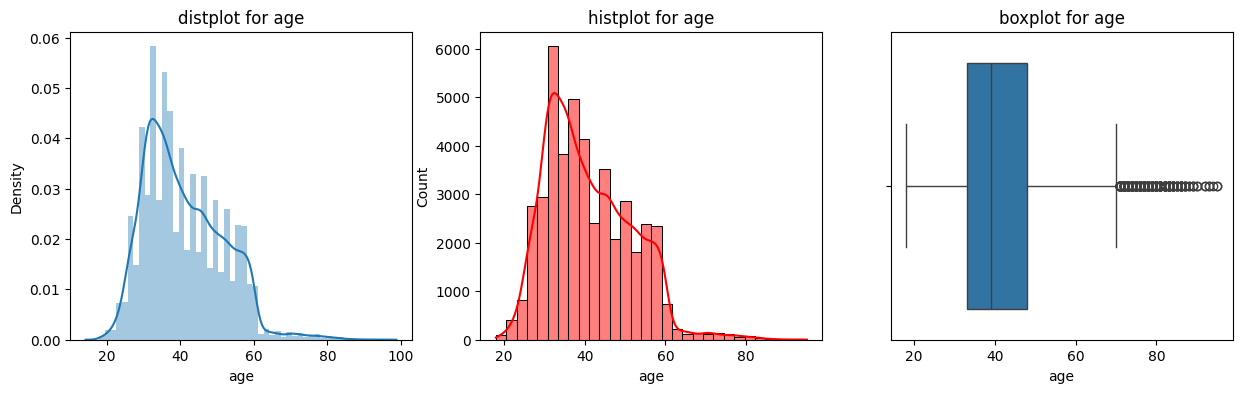

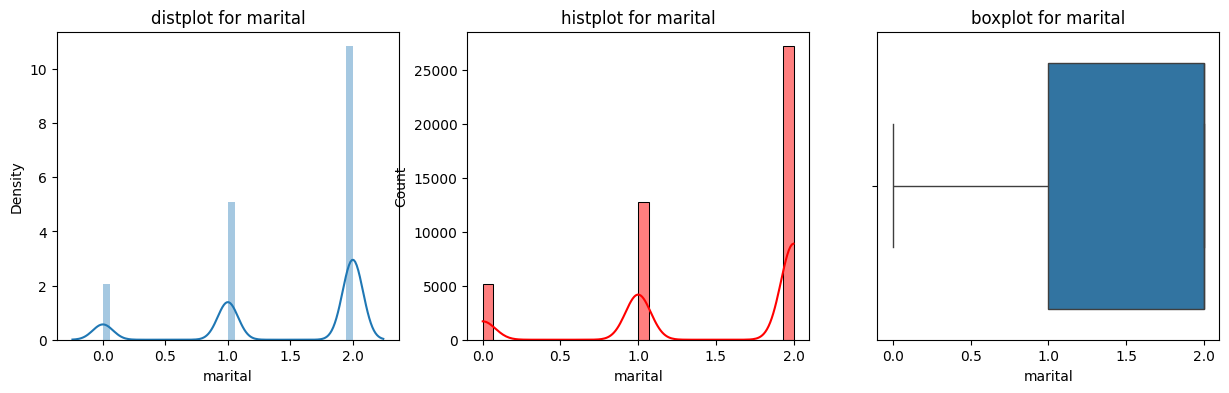

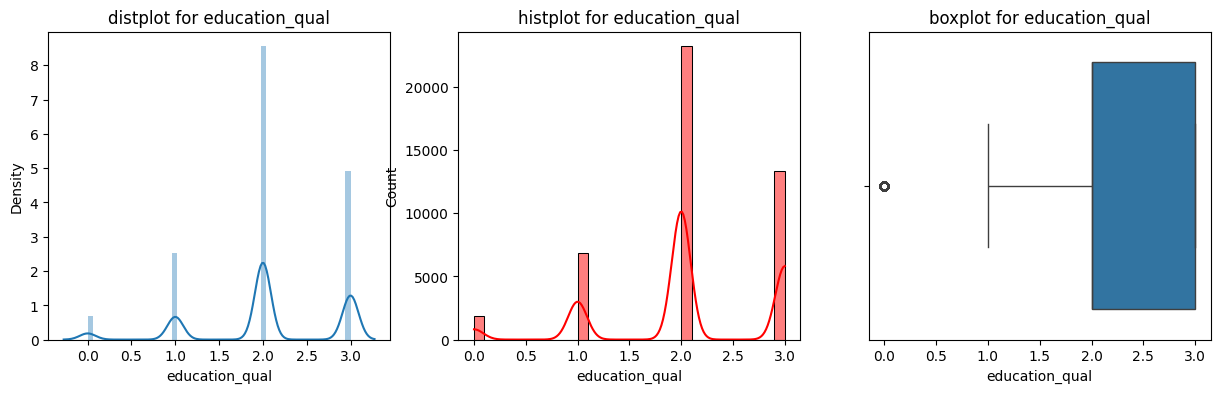

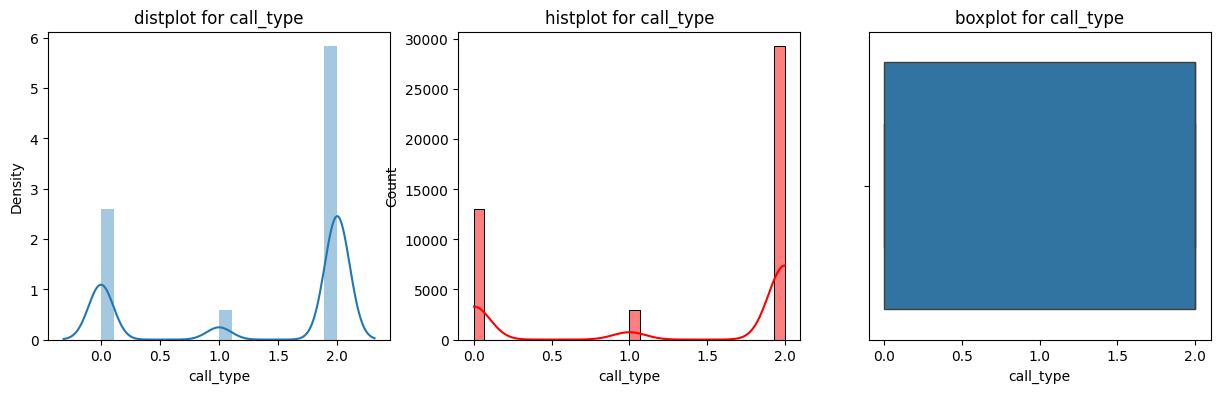

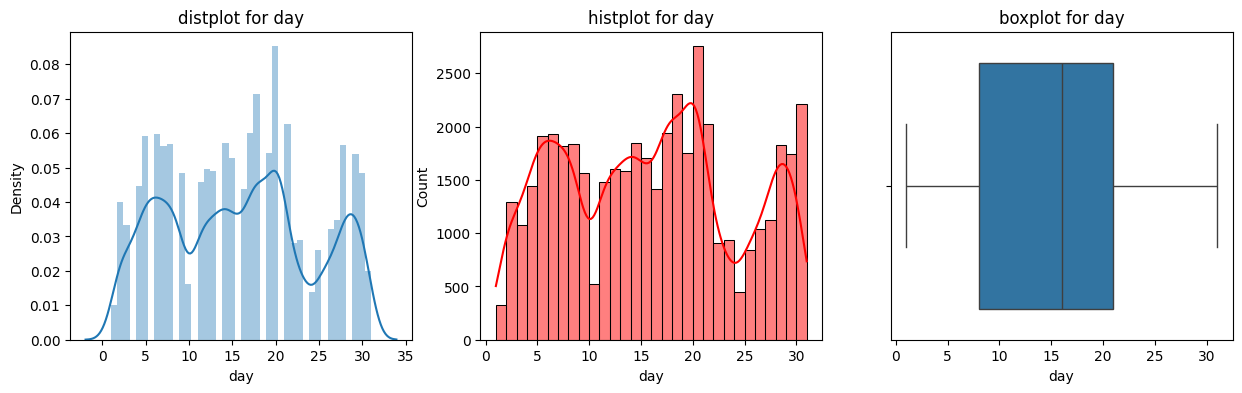

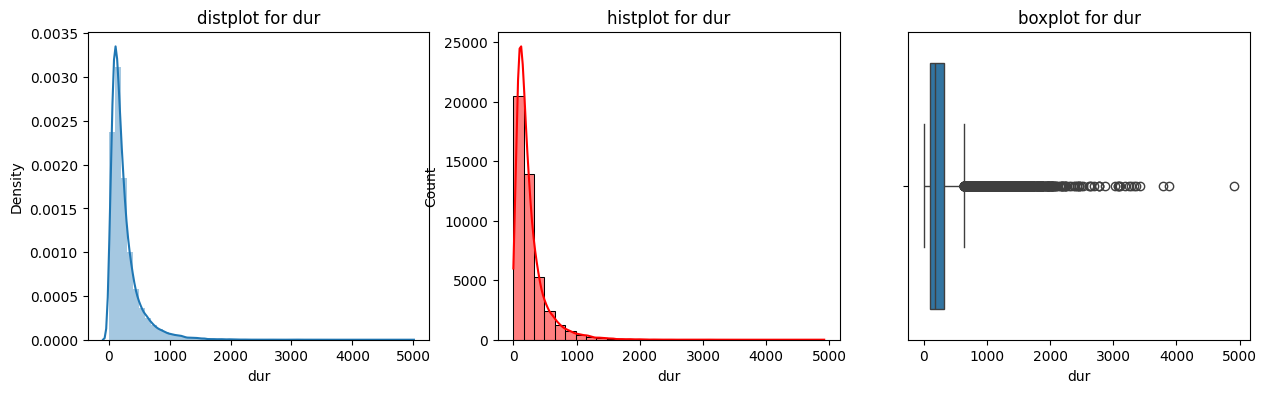

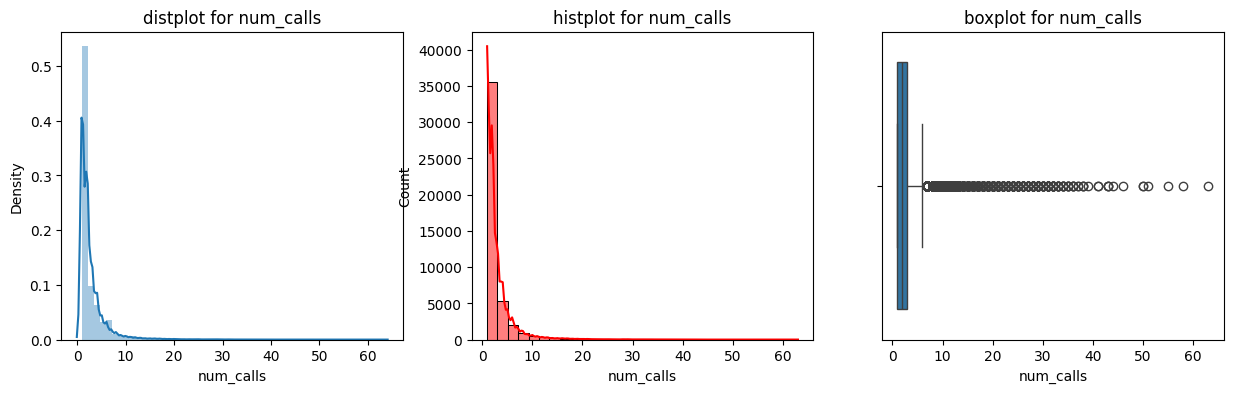

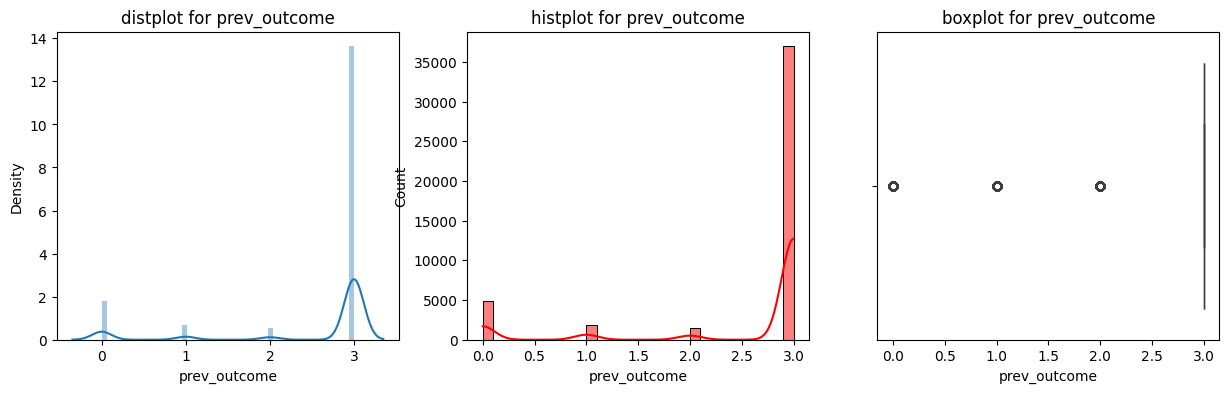

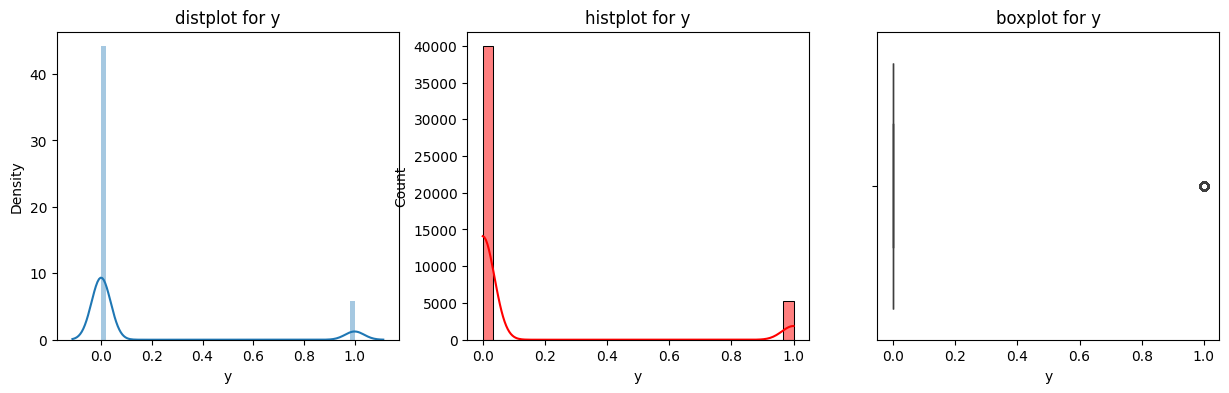

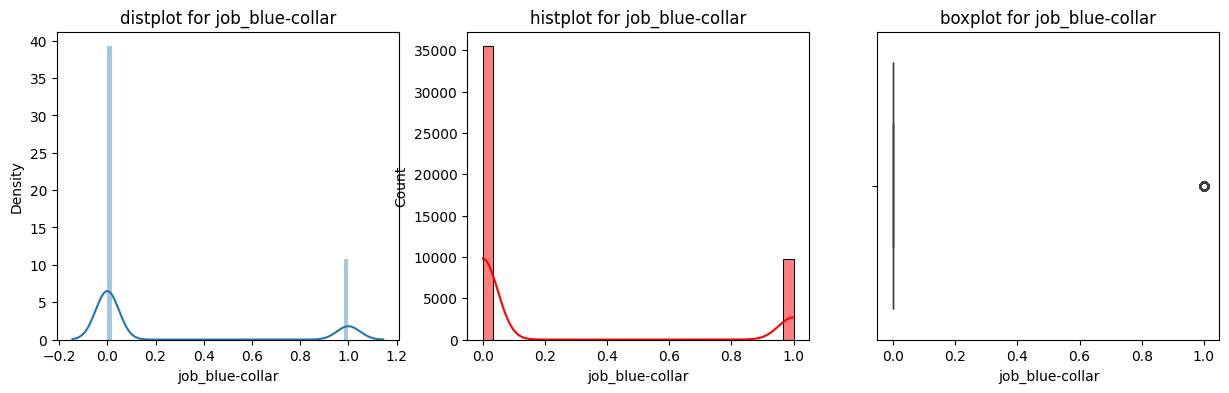

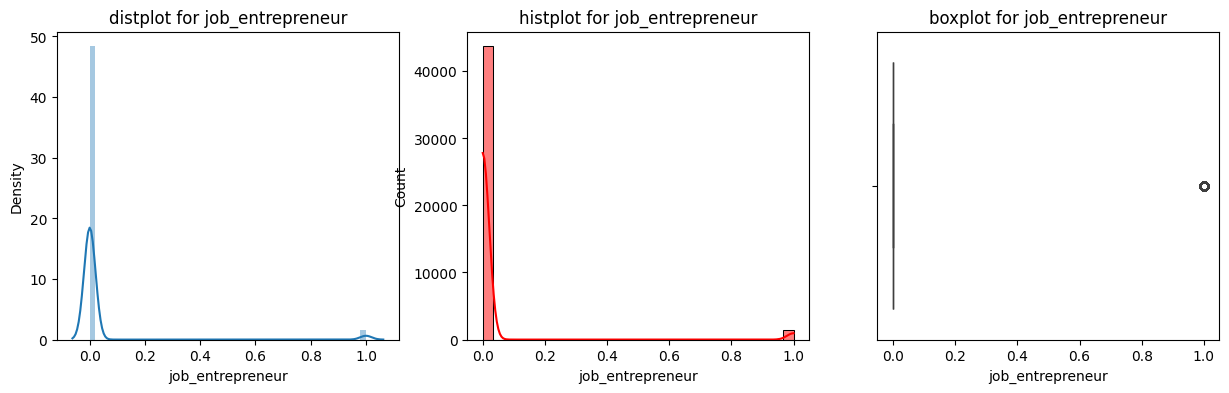

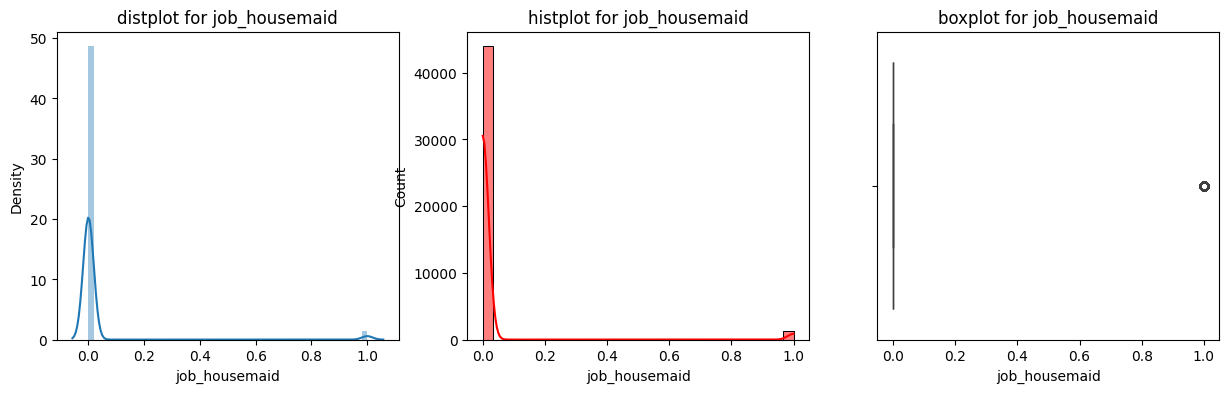

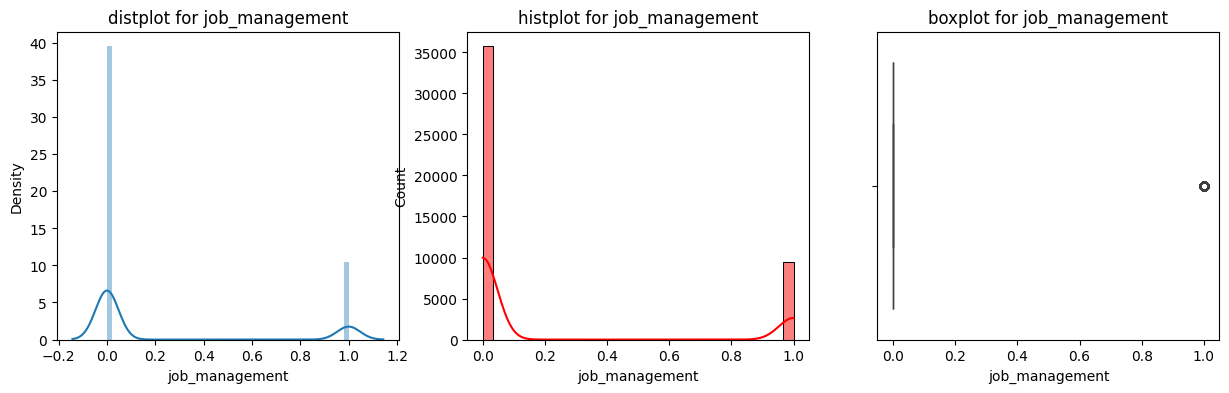

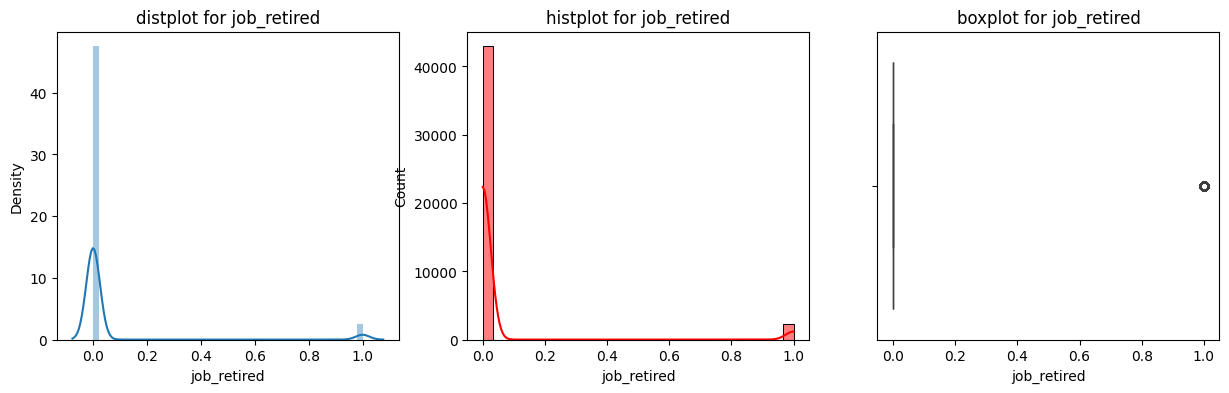

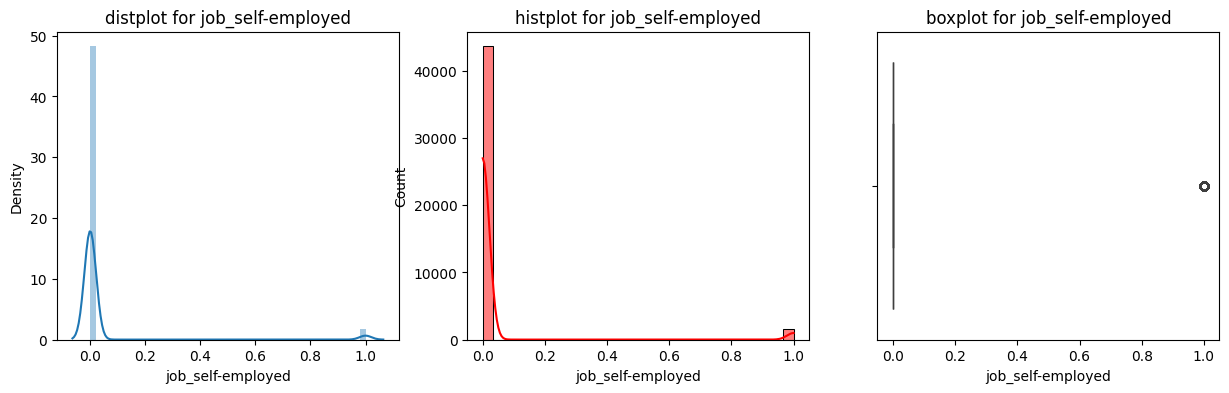

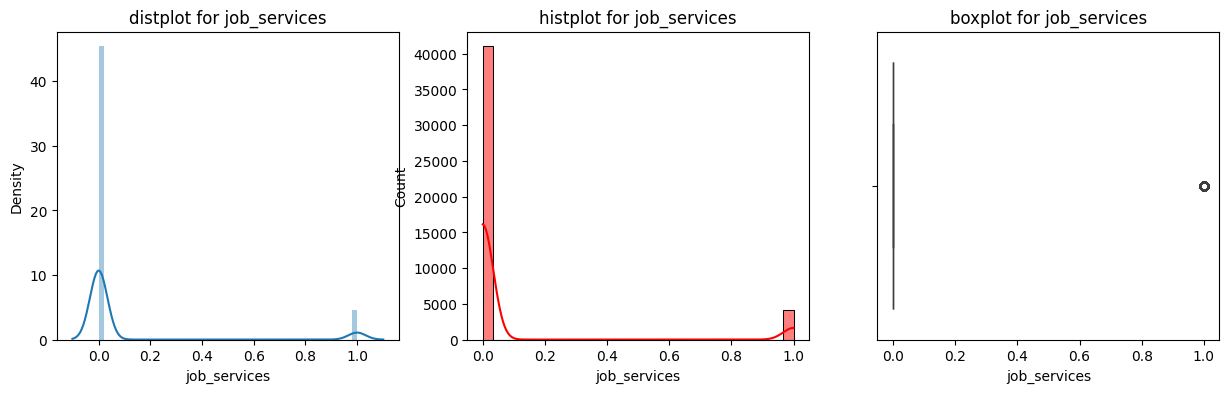

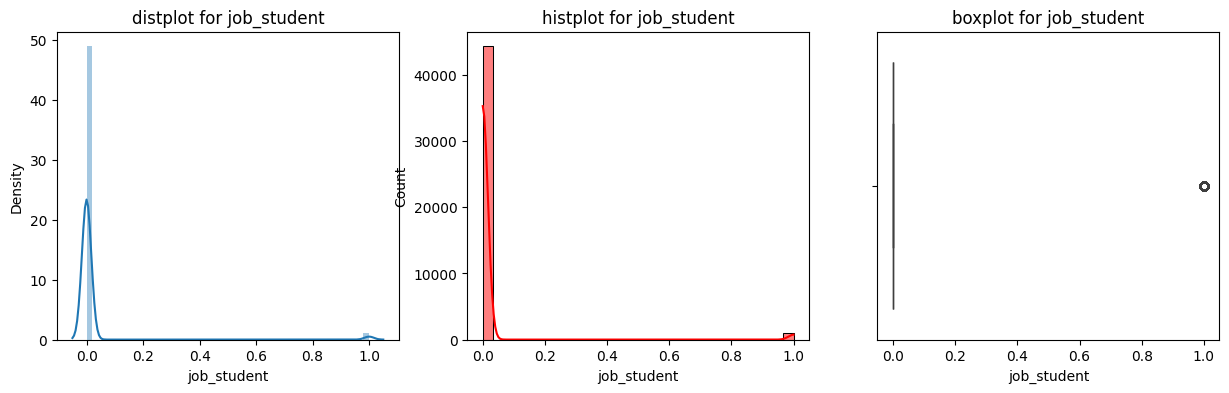

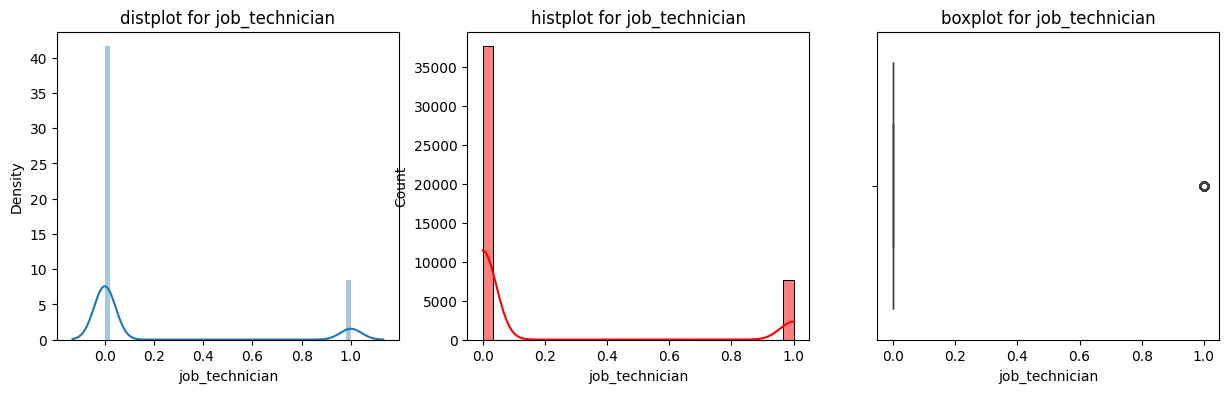

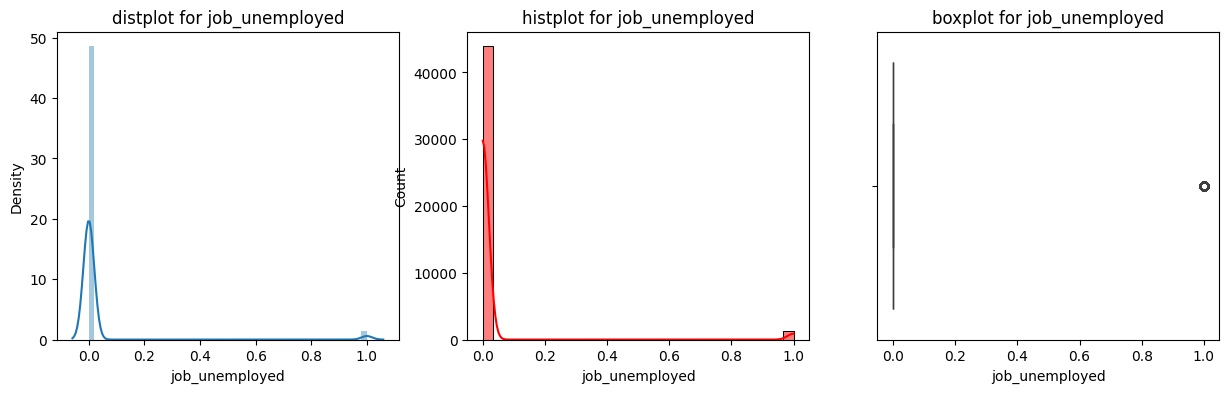

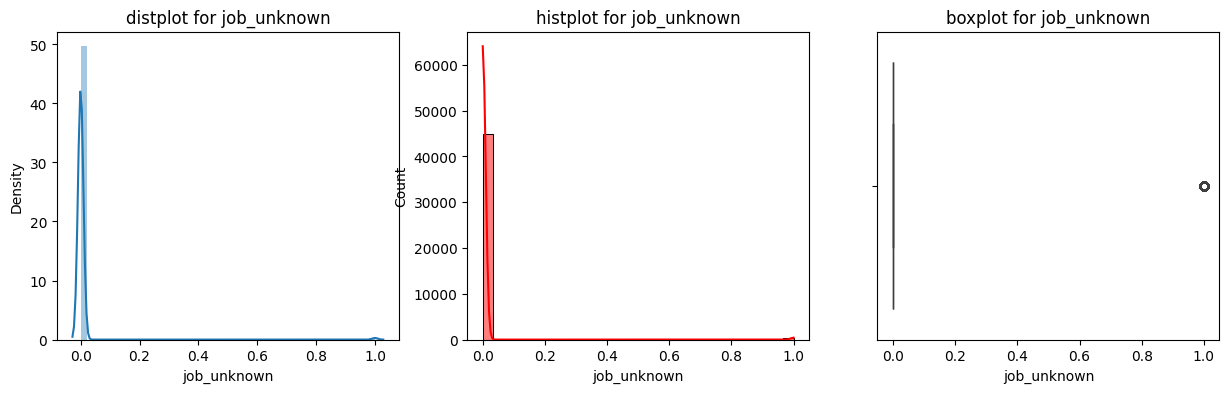

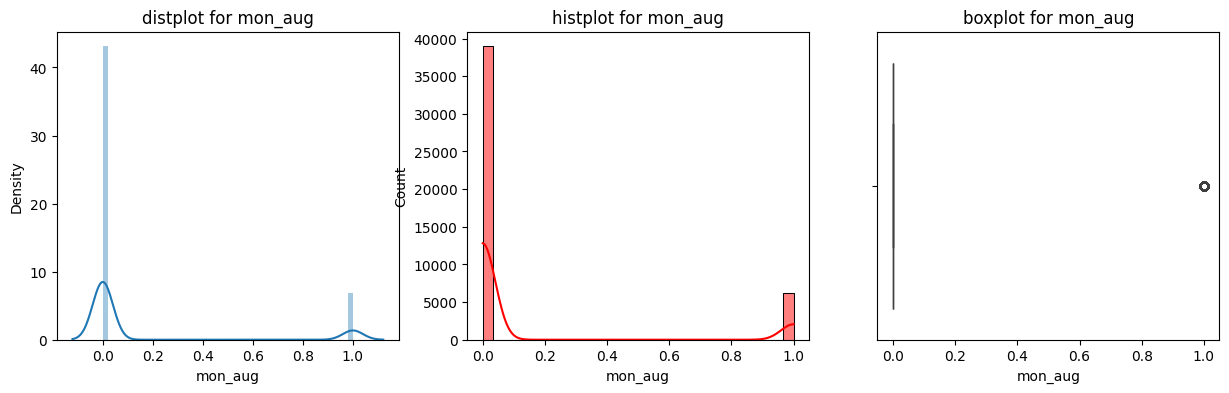

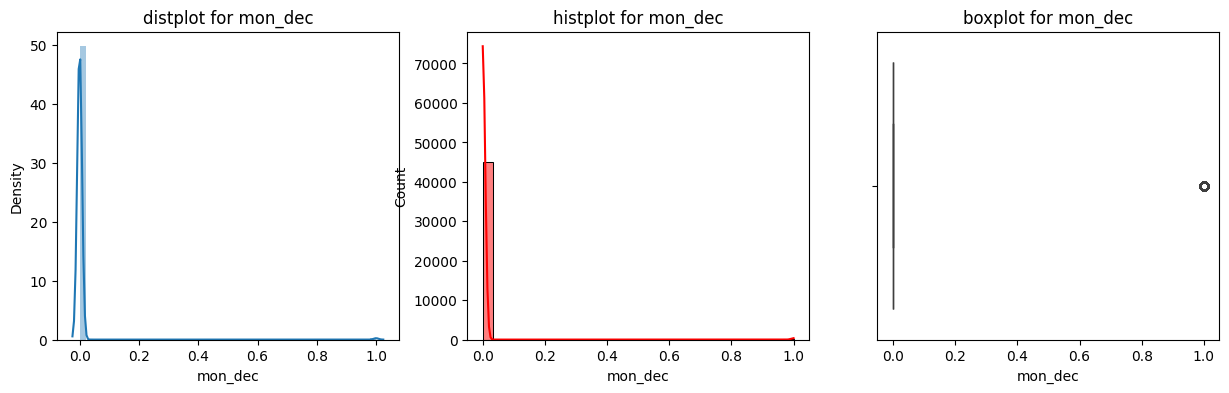

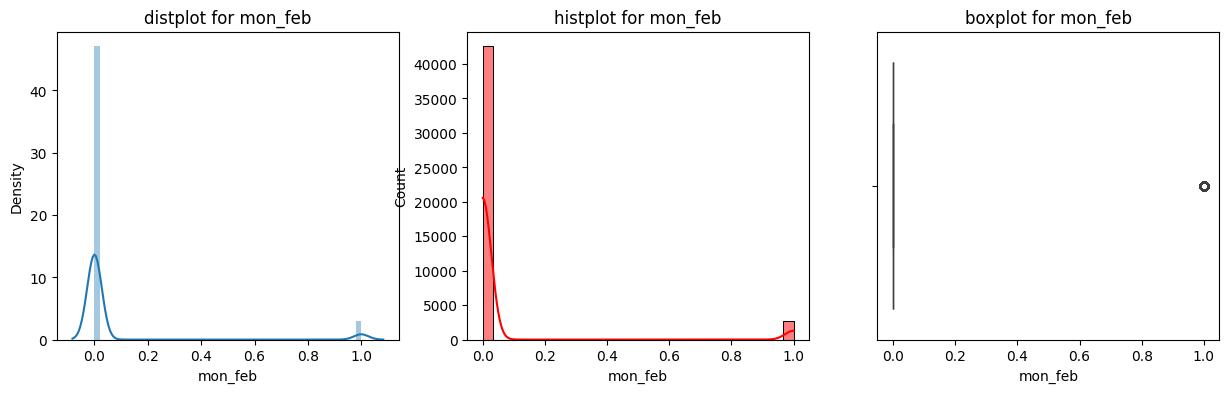

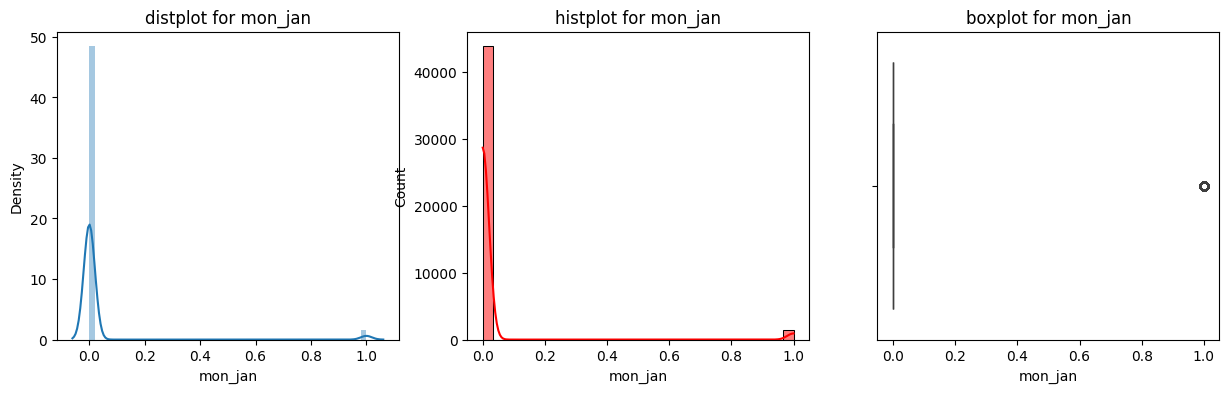

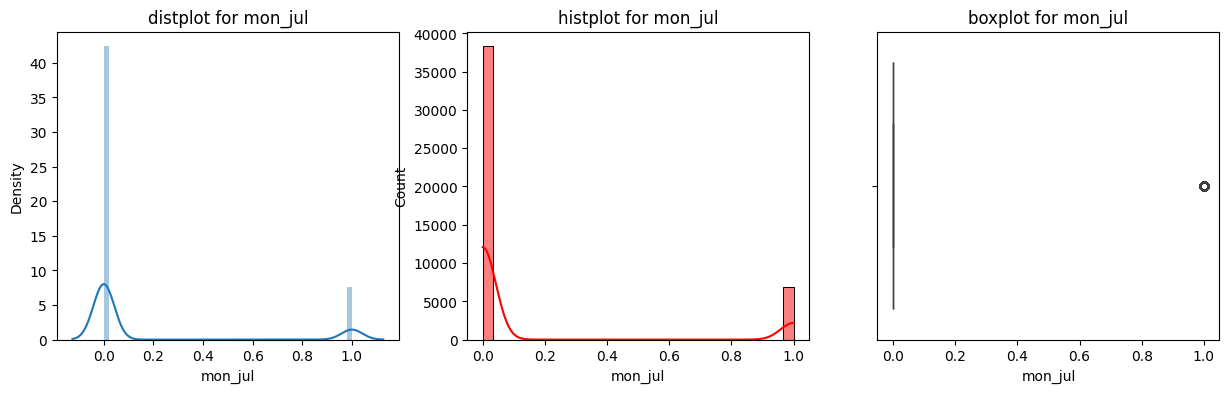

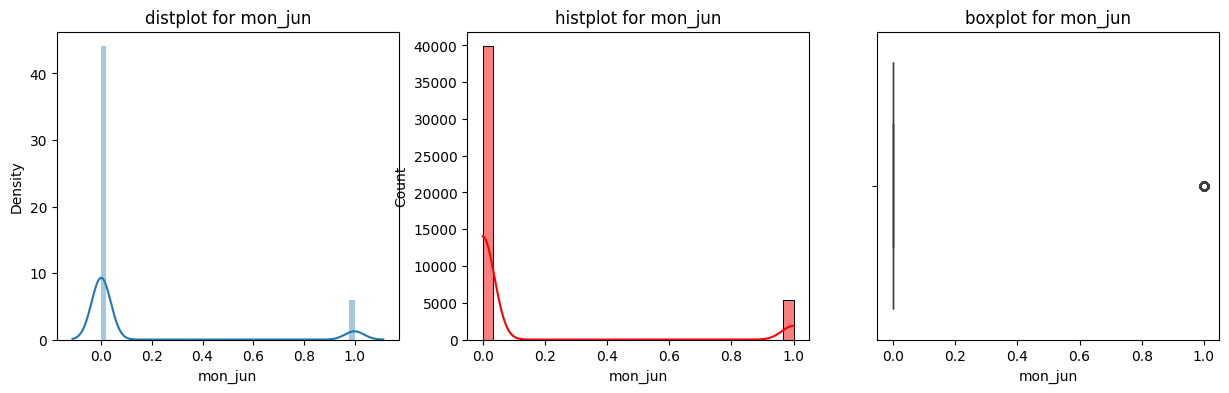

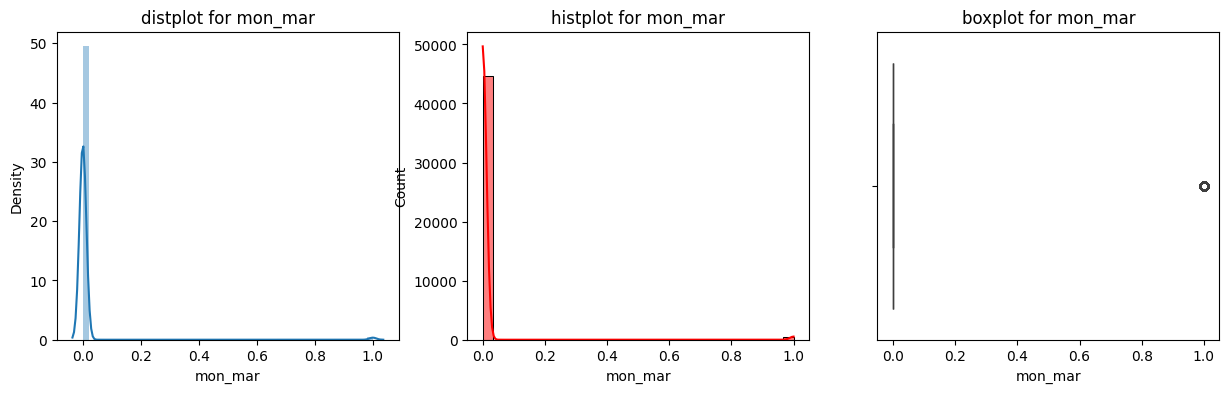

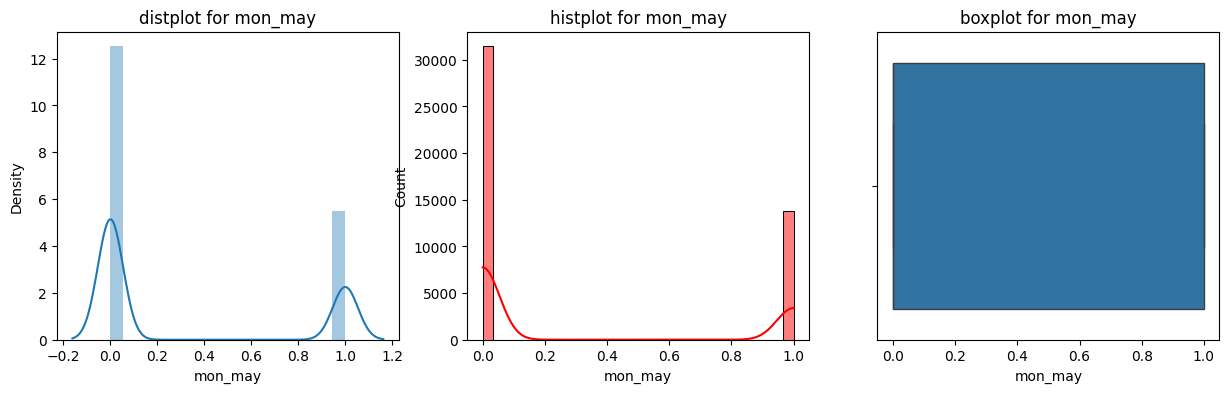

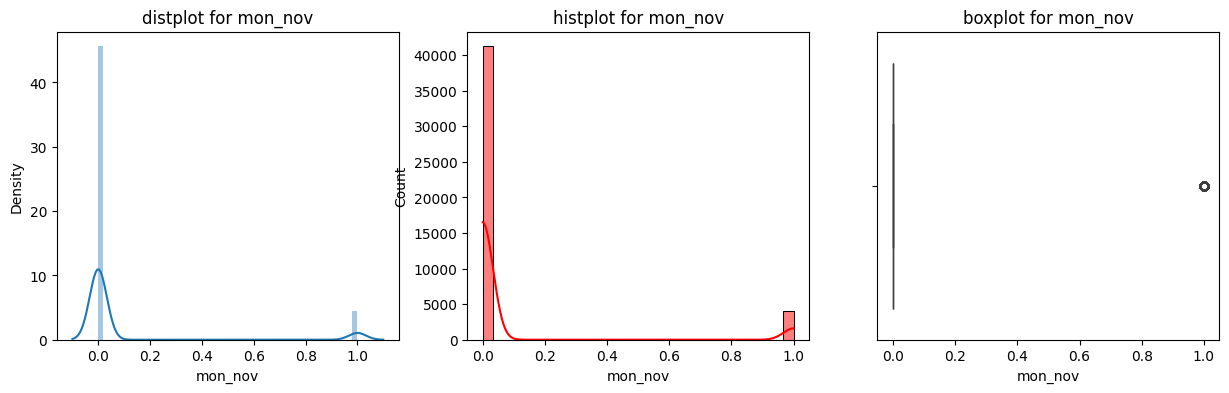

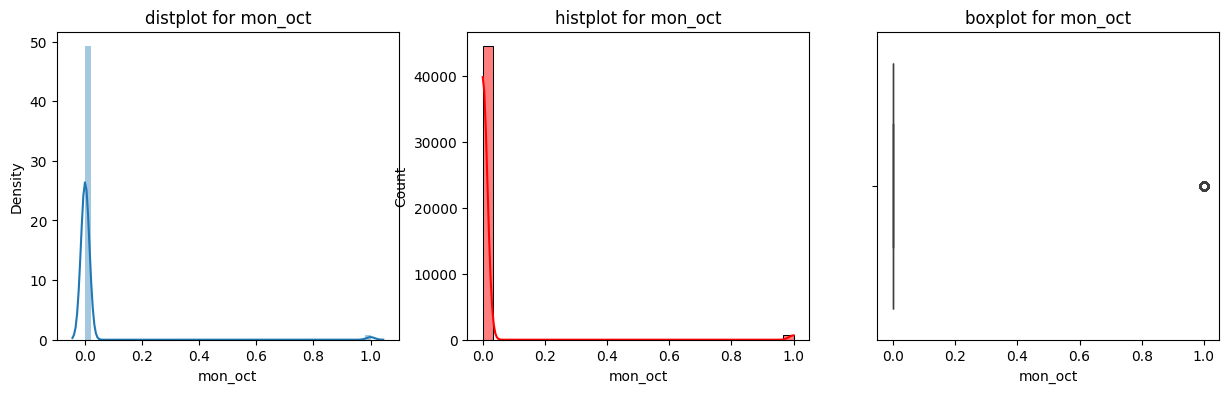

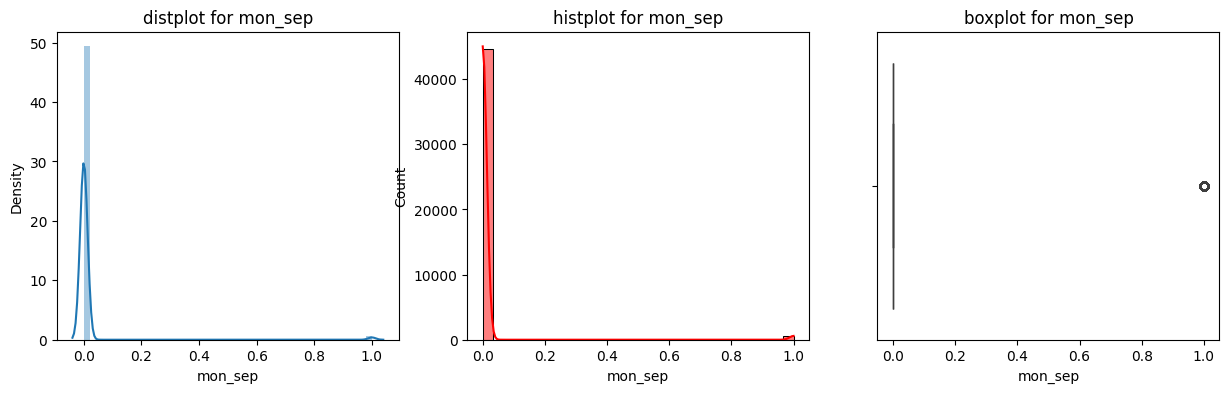

In [ ]:
#Skewness Ploting
for column in df.columns:
  plot(df,column)

In [ ]:
df1=df.copy()

In [ ]:
#Skewed columns
#Skewed columns - [prev_outcome_encoded, month_encoded, dur, y]
#After further Analysing the skewness is not important for the categorical columns.
#np.log1p - +ve
#np.sqrt  -
#np.cbrt  -

#Applying the Transformation for duration column

df1['dur'] = np.sqrt(df1['dur'])
df1['age']=np.log1p(df1['age']) # slightly skew
df1['num_calls'] = np.log(df1['num_calls'])

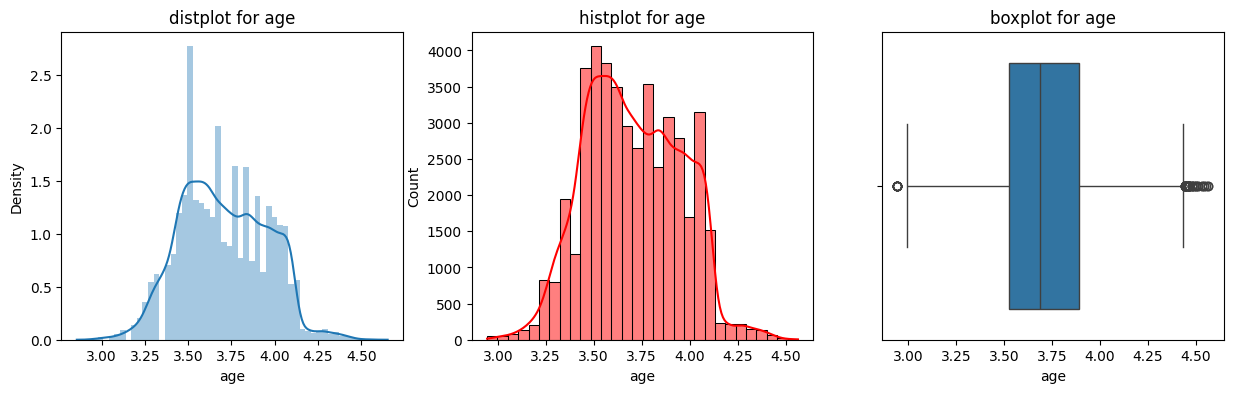

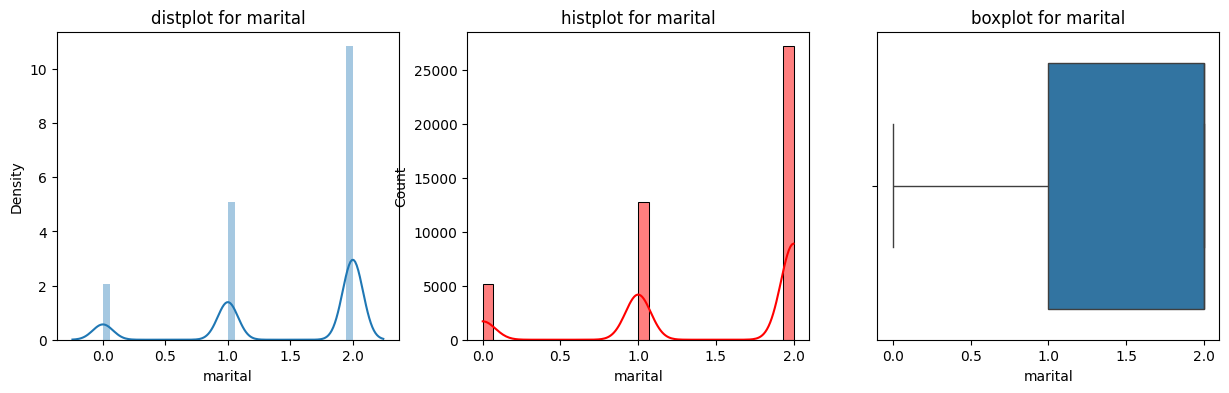

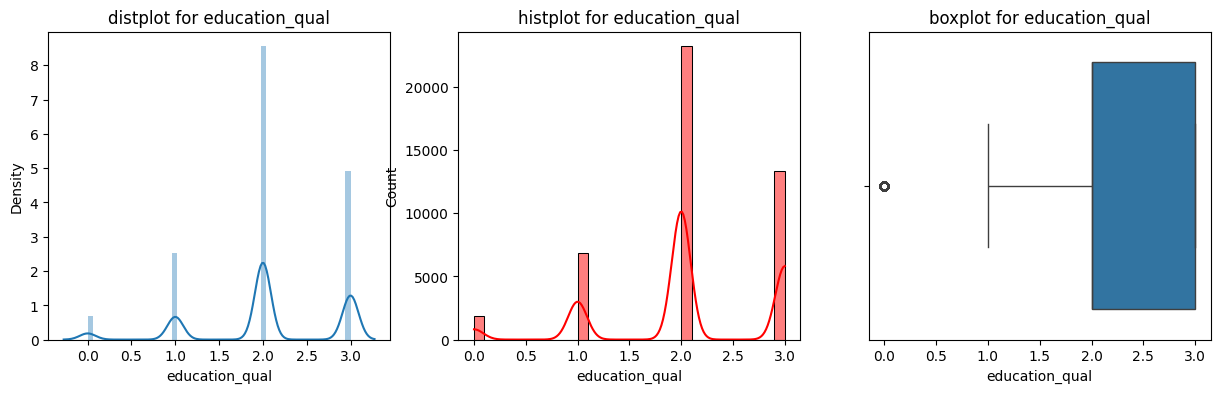

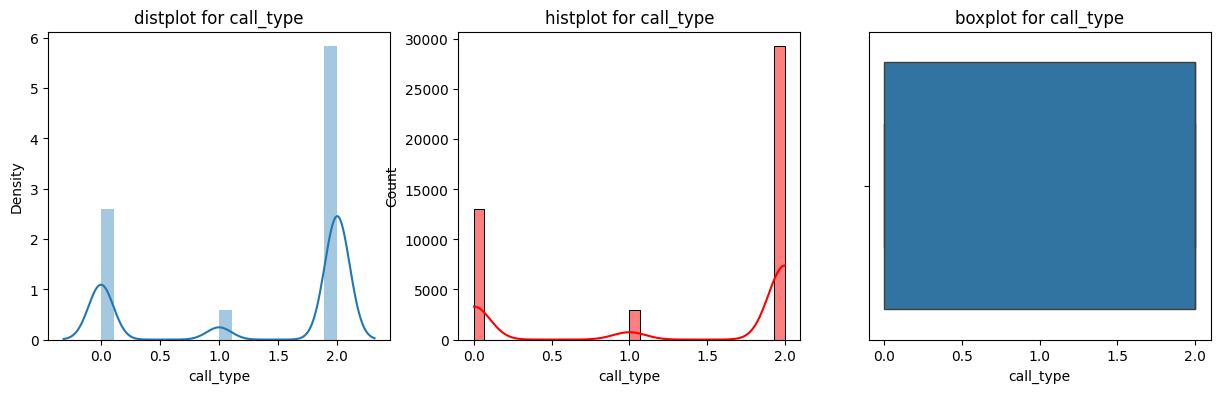

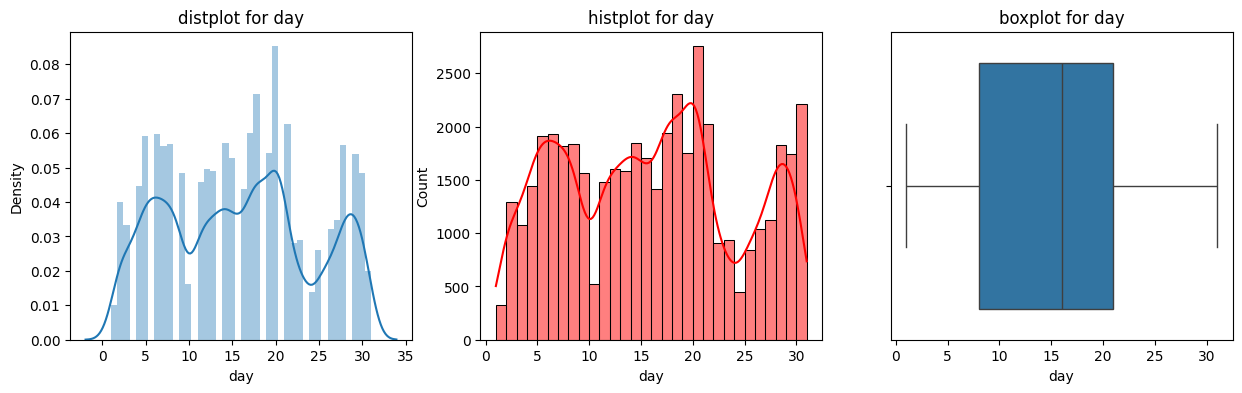

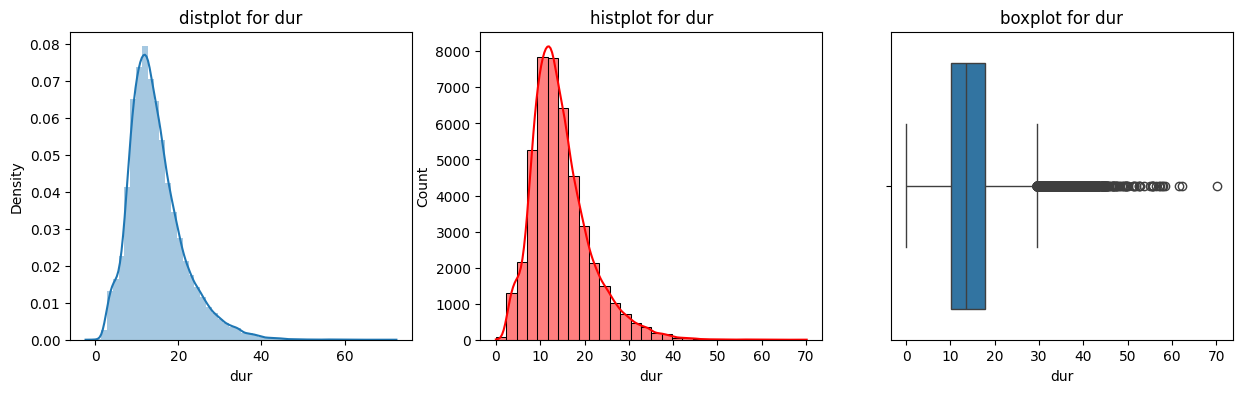

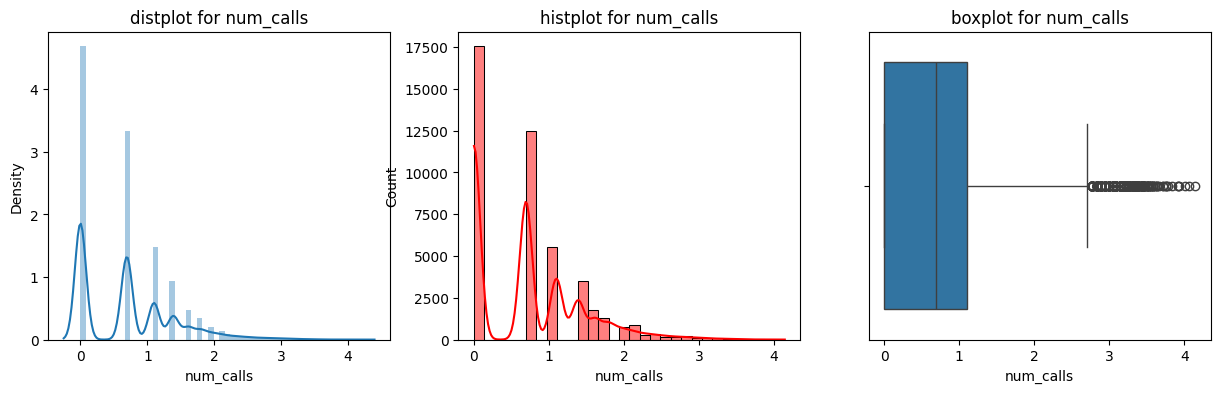

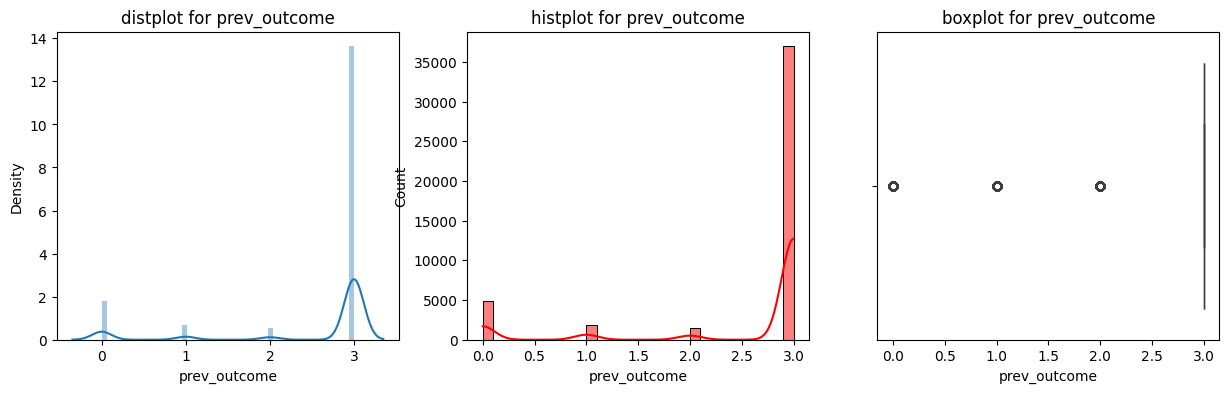

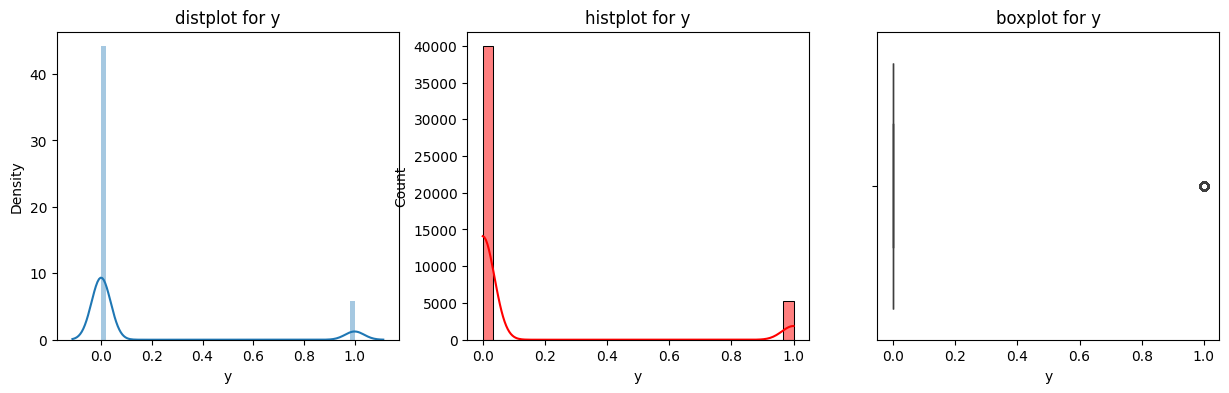

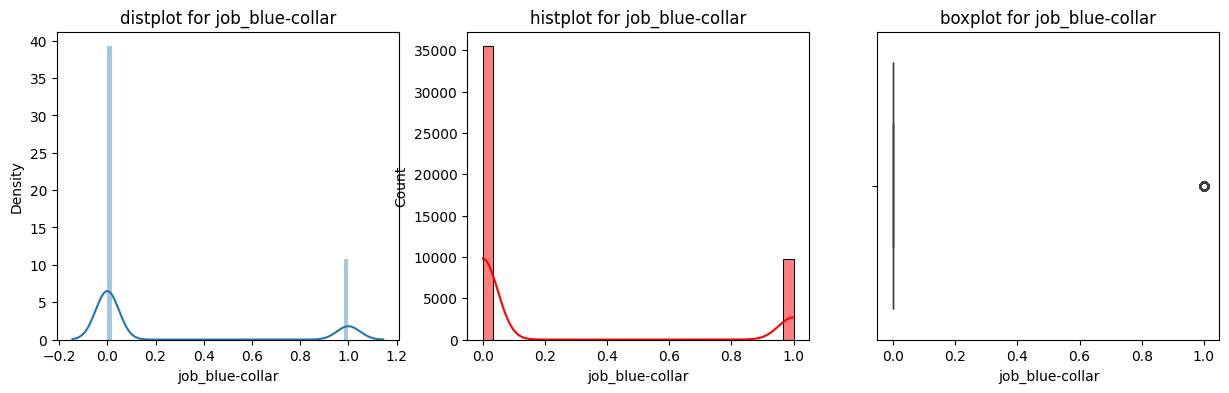

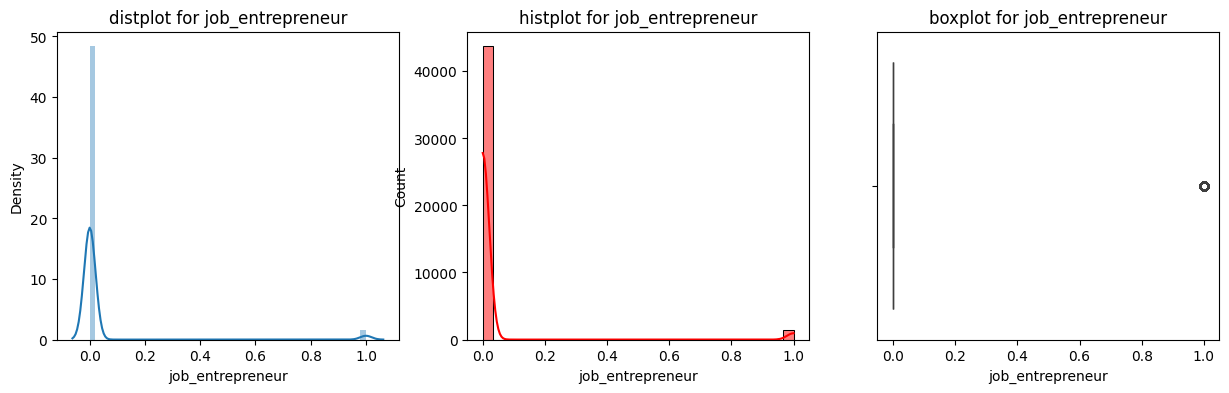

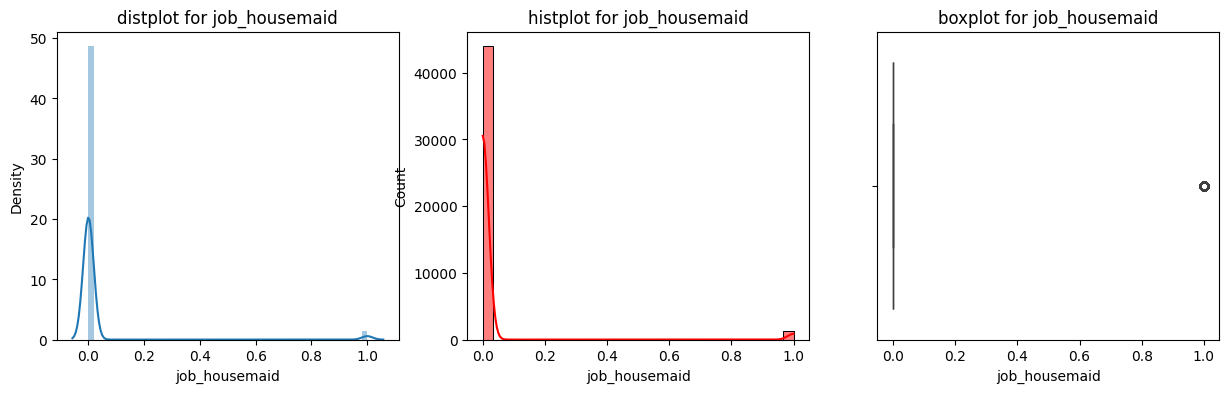

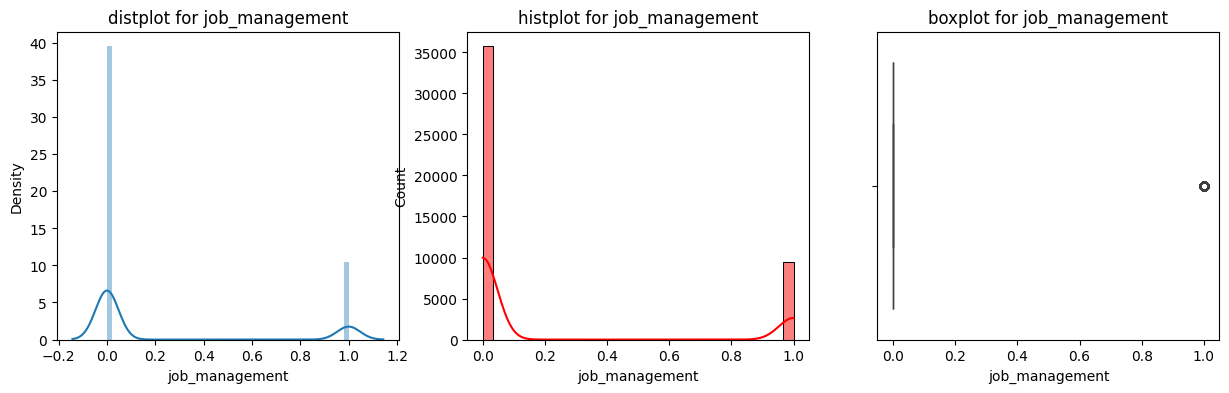

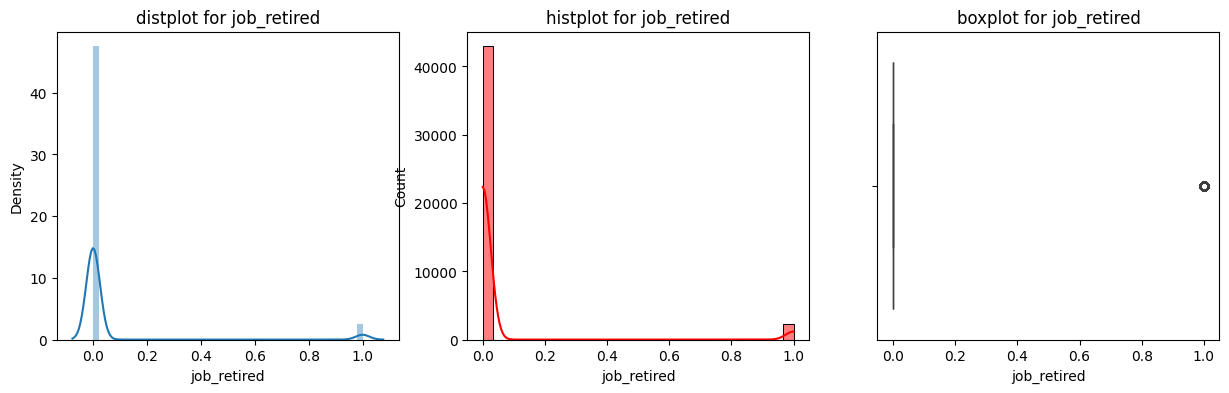

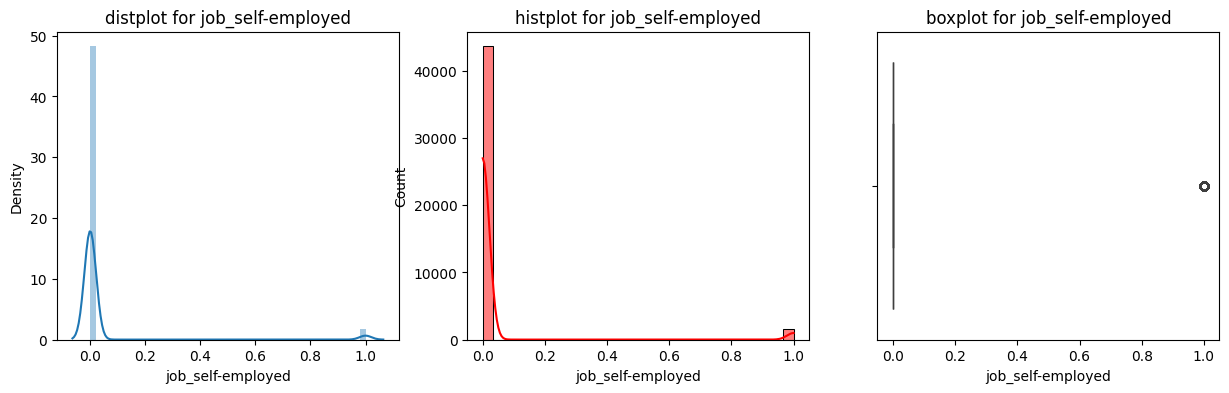

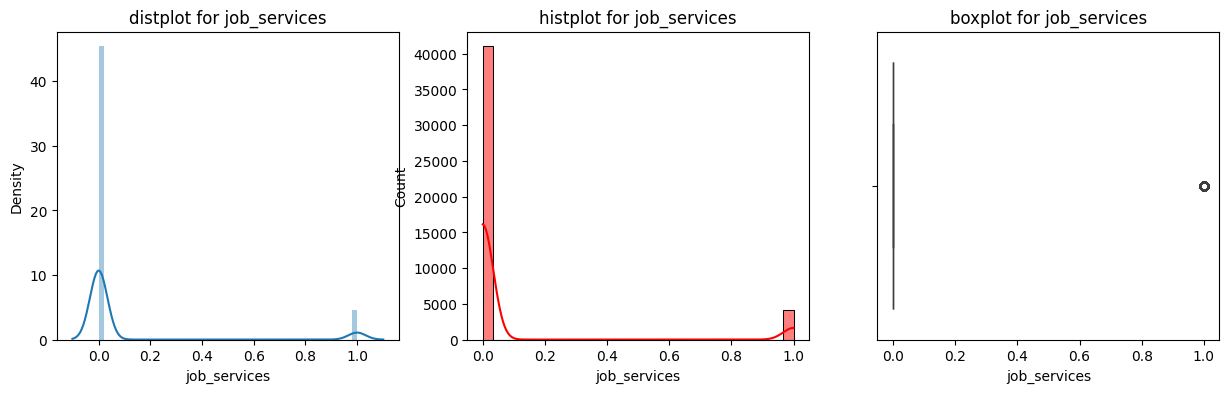

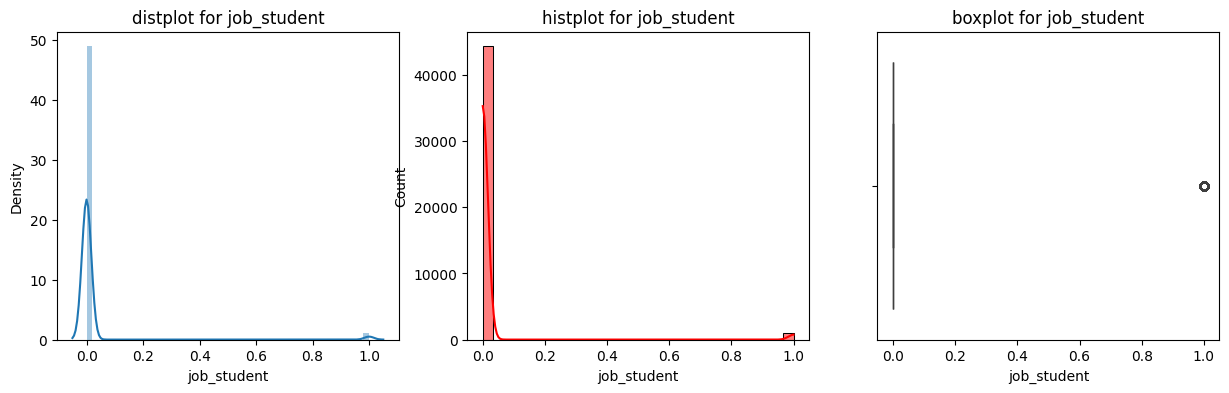

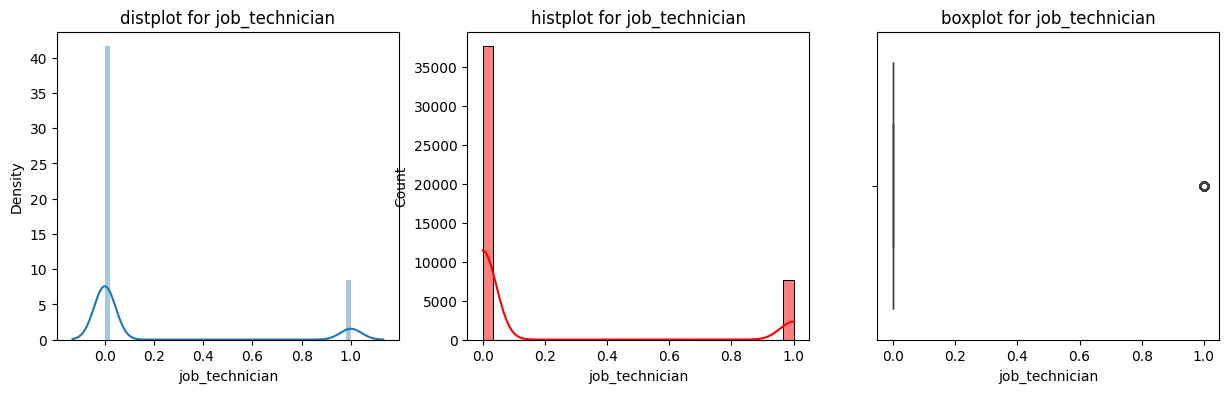

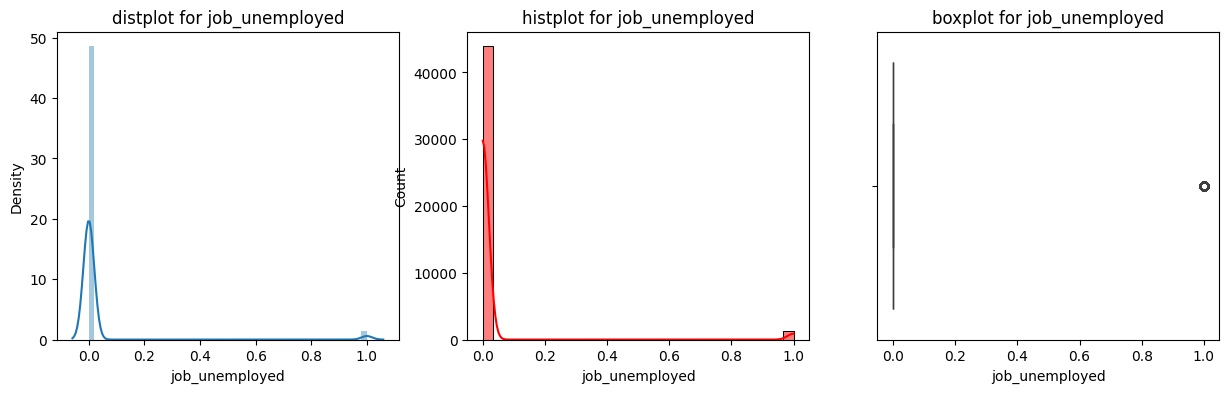

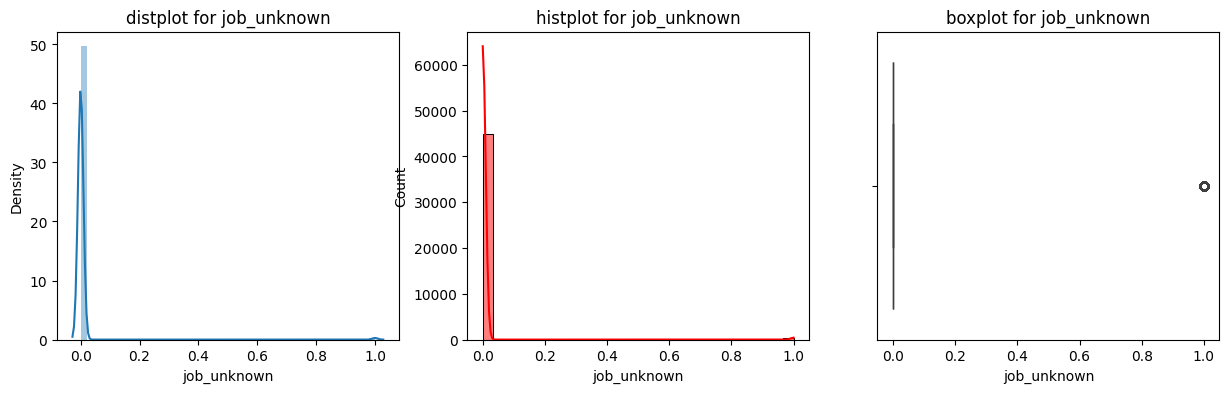

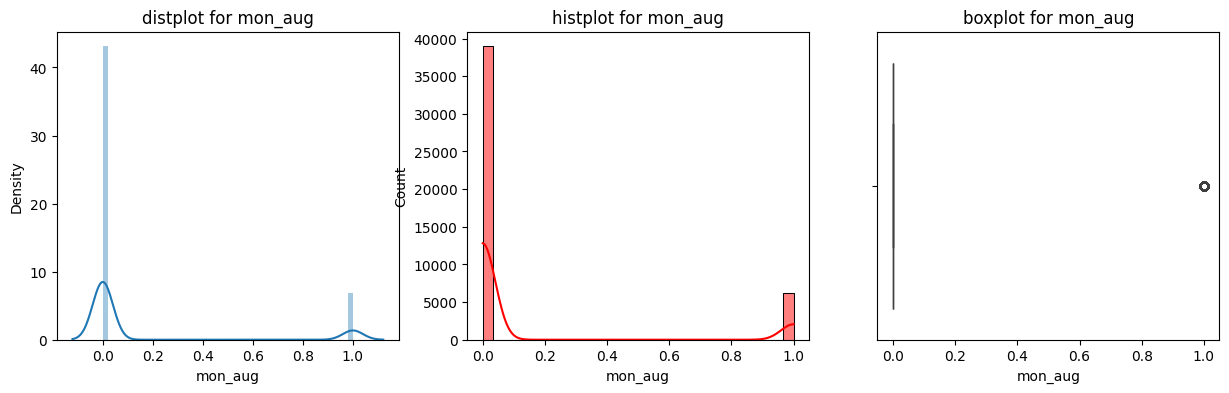

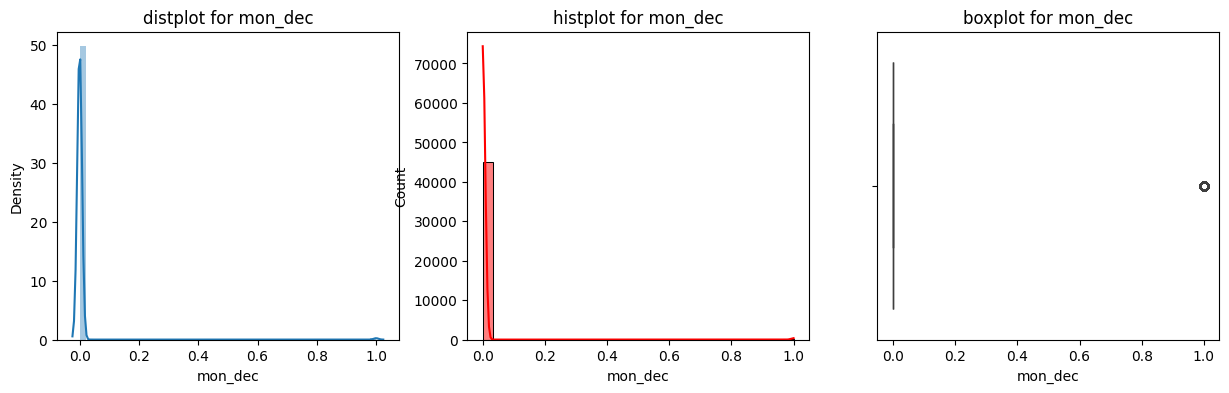

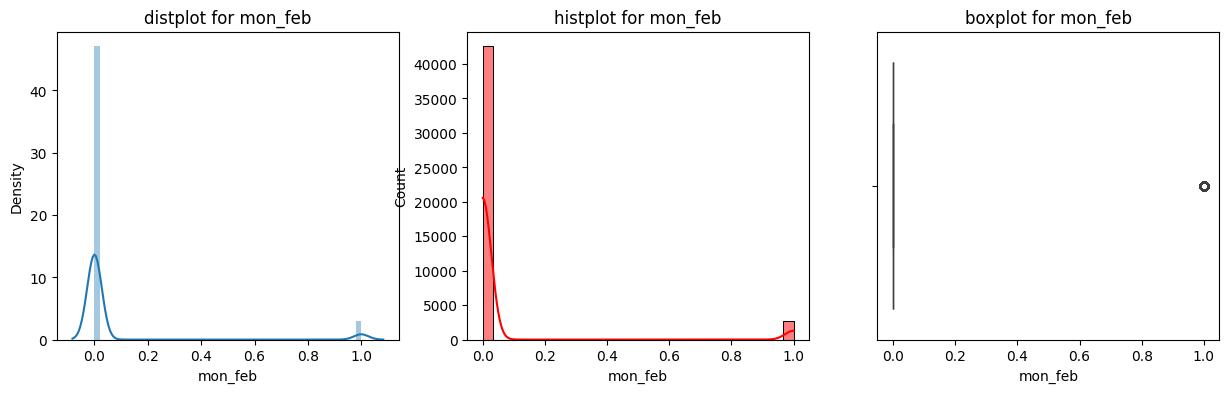

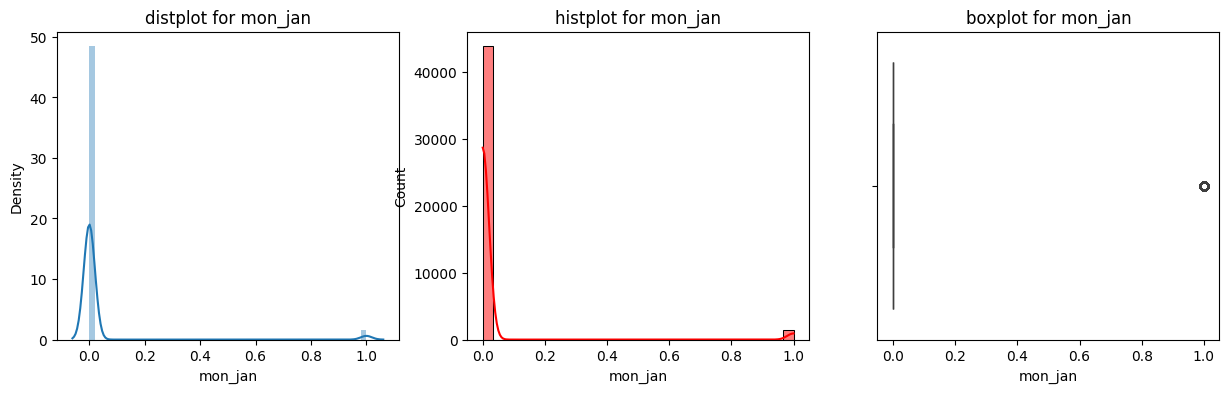

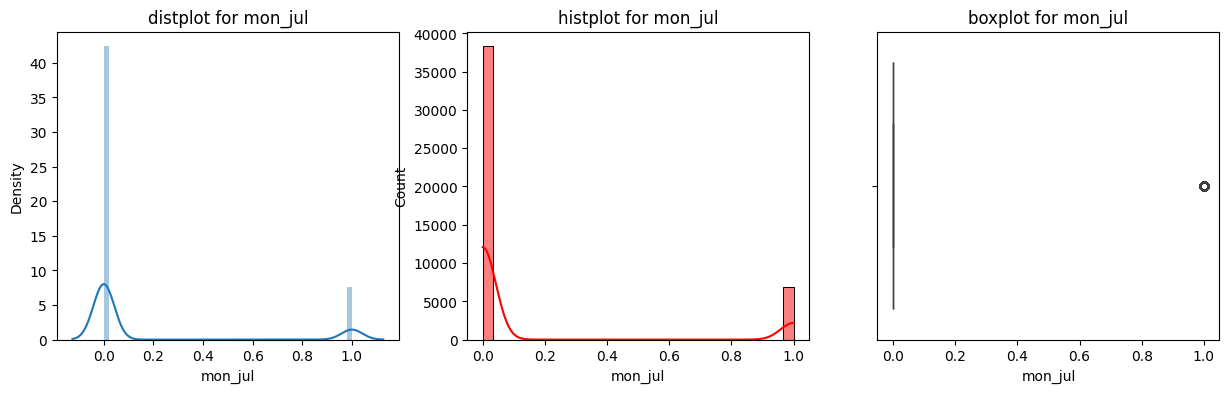

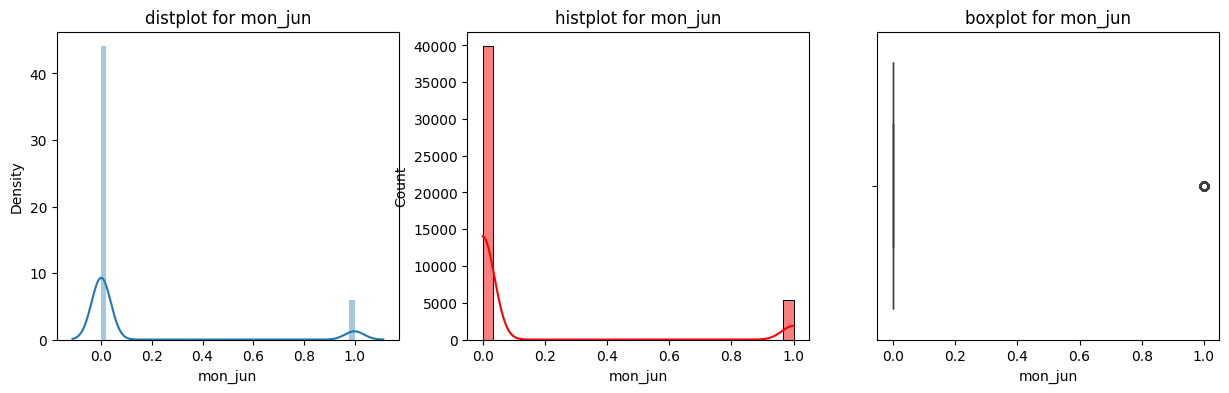

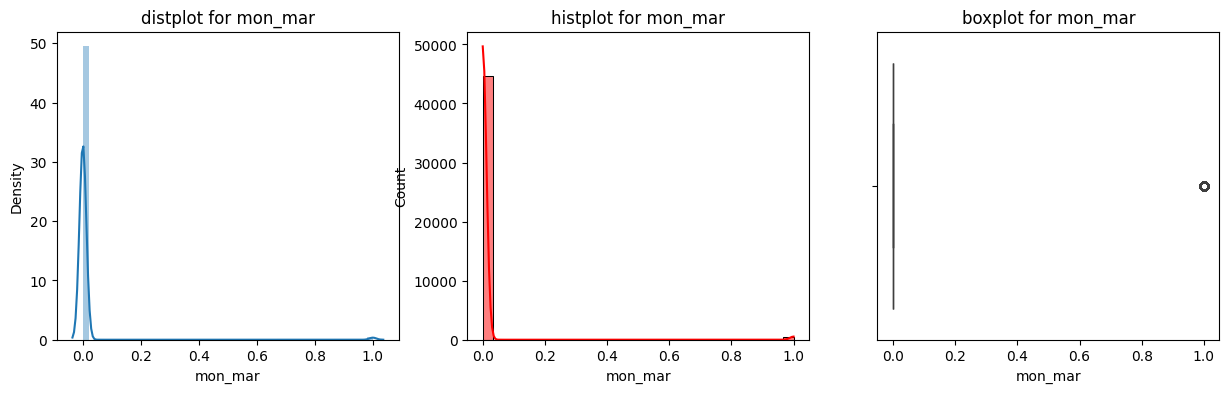

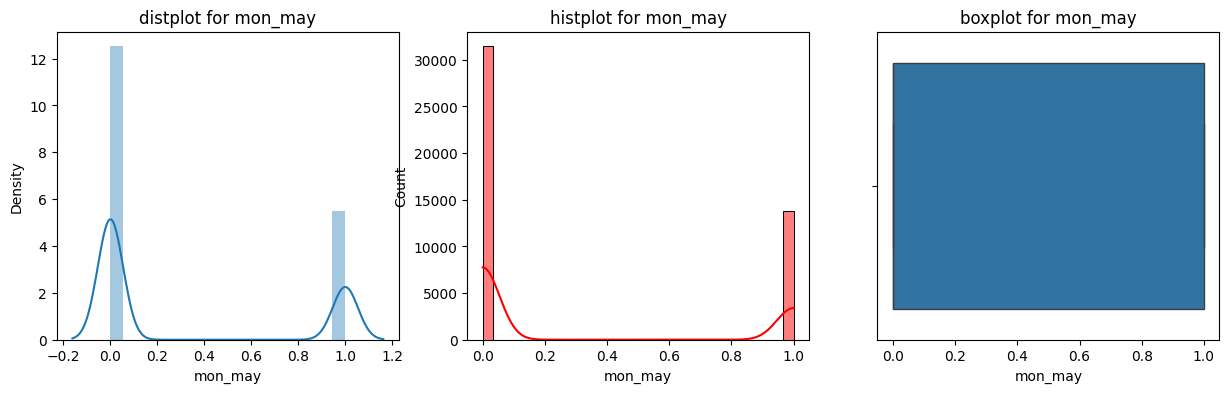

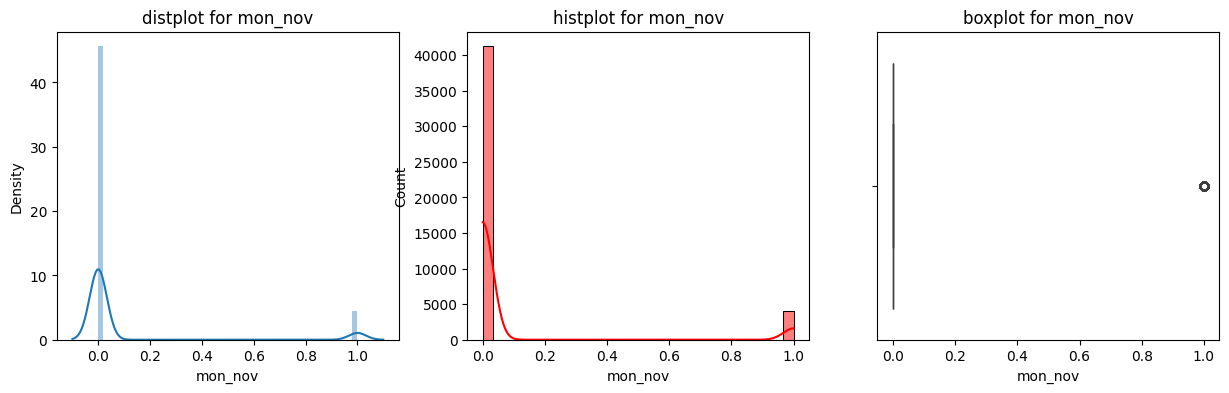

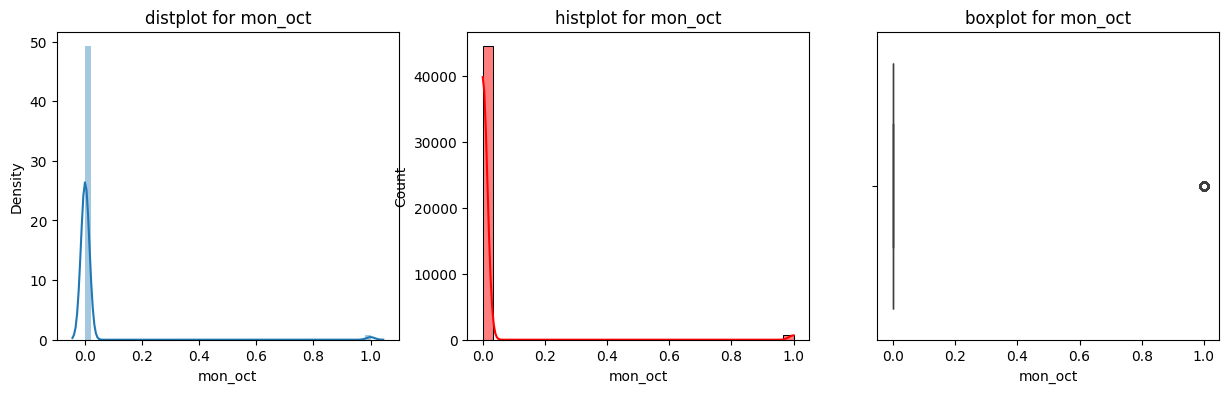

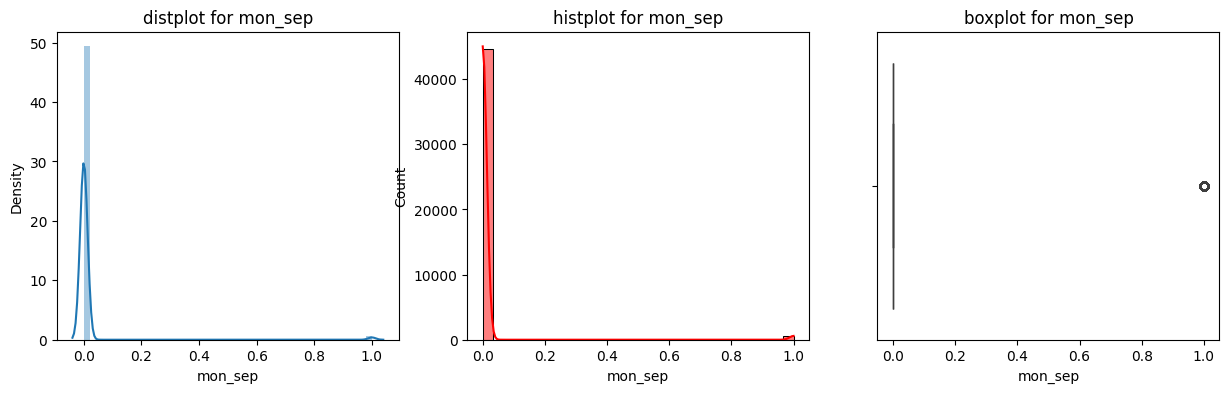

In [ ]:
for column in df1.columns:
  plot(df1,column)

# outlier detection

In [ ]:
for column in ['age','dur','num_calls'] :
  iqr=df1[column].quantile(0.75)-df1[column].quantile(0.25)
  upper_bound=df1[column].quantile(0.75)+(1.5*iqr)
  lower_bound=df1[column].quantile(0.25)-(1.5*iqr)
  print(f"lower_bound for {column} is {lower_bound}, upper_bound for {column} is {upper_bound}")
  print()
  print(np.log1p(df[column].describe()))
  print()
  df1[column] = df1[column].clip(lower_bound,upper_bound)
  print()

lower_bound for age is 2.978170864374464, upper_bound for age is 4.440009958352324

count    10.718985
mean      3.736171
std       2.452653
min       2.944439
25%       3.526361
50%       3.688879
75%       3.891820
max       4.564348
Name: age, dtype: float64


lower_bound for dur is -1.4186277365070783, upper_bound for dur is 29.428090401091048

count    10.718985
mean      5.557535
std       5.555045
min       0.000000
25%       4.644391
50%       5.198497
75%       5.768321
max       8.500861
Name: dur, dtype: float64


lower_bound for num_calls is -1.6479184330021646, upper_bound for num_calls is 2.7465307216702746

count    10.718985
mean      1.325455
std       1.410545
min       0.693147
25%       0.693147
50%       1.098612
75%       1.386294
max       4.158883
Name: num_calls, dtype: float64




In [ ]:
print("After clipping")
print(df1[['age','dur','num_calls']].describe())

After clipping
                age           dur     num_calls
count  45205.000000  45205.000000  45205.000000
mean       3.705130     14.459551      0.703126
std        0.248103      6.098546      0.700117
min        2.978171      0.000000      0.000000
25%        3.526361     10.148892      0.000000
50%        3.688879     13.416408      0.693147
75%        3.891820     17.860571      1.098612
max        4.440010     29.428090      2.746531


In [ ]:
#Split the data:
X=df1.drop(columns=['y'])
y=df1['y']

In [ ]:
X.head()

,age,marital,education_qual,call_type,day,dur,num_calls,prev_outcome,job_blue-collar,job_entrepreneur,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
0,4.077537,2,3,0,5,16.155494,0.0,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.806662,1,2,0,5,12.288206,0.0,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.526361,2,2,0,5,8.717798,0.0,3,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.871201,2,0,0,5,9.591663,0.0,3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.526361,1,0,0,5,14.071247,0.0,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36164, 30) (9041, 30) (36164,) (9041,)


In [ ]:
#Since Its an imbalanced dataset, we are using

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_resampled.shape,y_train_resampled.shape

((63922, 30), (63922,))

In [ ]:
y_train_resampled.value_counts()

,count
y,
0,31961
1,31961


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train_resampled, y_train_resampled)
train_model_score = Logistic_model.score(X_train,y_train)
y_train_preds=Logistic_model.predict(X_train_resampled)
y_preds = Logistic_model.predict(X_test)

print("Training Data :")
print(f"Model score = {train_model_score:.4f}")
print(f"F1 score = {f1_score(y_train_resampled,y_train_preds):.4f}")
print()
print()

print("Test Data :")
model_score = Logistic_model.score(X_test,y_test)
y_train_preds=Logistic_model.predict(X_train_resampled)
y_preds = Logistic_model.predict(X_test)

print(f"Model score = {model_score:.4f}")
print(f"F1 score = {f1_score(y_test,y_preds):.4f}")

print("Classification Report :")
print(classification_report(y_test,y_preds))

print("confusion Matrix :")
print(confusion_matrix(y_test,y_preds))

Training Data :
Model score = 0.8070
F1 score = 0.8189


Test Data :
Model score = 0.8077
F1 score = 0.4999
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7955
           1       0.36      0.80      0.50      1086

    accuracy                           0.81      9041
   macro avg       0.67      0.80      0.69      9041
weighted avg       0.89      0.81      0.84      9041

confusion Matrix :
[[6433 1522]
 [ 217  869]]


In [ ]:
#Dumping Logistic model

with open ('logistic_model.pkl','wb') as f:
  pickle.dump(Logistic_model,f)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

best_depth = None
best_f1 = 0
best_model = None

for depth in range(10,16,1):
  dt_model = DecisionTreeClassifier(max_depth=depth)
  dt_model.fit(X_train_resampled, y_train_resampled)
  train_model_score = dt_model.score(X_train,y_train)
  y_train_preds=dt_model.predict(X_train_resampled)
  y_preds = dt_model.predict(X_test)

  print(f"depth = {depth}")
  cross_val = np.mean(cross_val_score(dt_model,X_train_resampled,y_train_resampled,cv=5))
  print(f"Cross Validation Score = {cross_val}")

  print("Training Data :")
  print(f"Model score = {train_model_score:.4f}")
  print(f"F1 score = {f1_score(y_train_resampled,y_train_preds):.4f}")
  print()

  # Metrics for test set
  print("Test Data :")
  model_score = dt_model.score(X_test,y_test)
  test_f1 = f1_score(y_test, y_preds)
  y_train_preds=dt_model.predict(X_train_resampled)
  y_preds = dt_model.predict(X_test)

  print(f"Model score = {model_score:.4f}")
  print(f"F1 score = {f1_score(y_test,y_preds):.4f}")
  print()

  # Update Best Model based on Test F1-Score
  if test_f1 > best_f1:
      best_f1 = test_f1
      best_depth = depth
      best_model = dt_model

print("\nBest Model Depth:", best_depth)
print(f"Best F1 Score on Test Data: {best_f1:.4f}")




depth = 10
Cross Validation Score = 0.8964836704366966
Training Data :
Model score = 0.8899
F1 score = 0.9146

Test Data :
Model score = 0.8671
F1 score = 0.5670

depth = 11
Cross Validation Score = 0.9018183672590346
Training Data :
Model score = 0.8962
F1 score = 0.9229

Test Data :
Model score = 0.8663
F1 score = 0.5653

depth = 12
Cross Validation Score = 0.908029151858282
Training Data :
Model score = 0.8967
F1 score = 0.9312

Test Data :
Model score = 0.8567
F1 score = 0.5433

depth = 13
Cross Validation Score = 0.9107043256064605
Training Data :
Model score = 0.9112
F1 score = 0.9415

Test Data :
Model score = 0.8654
F1 score = 0.5586

depth = 14
Cross Validation Score = 0.9128476174999743
Training Data :
Model score = 0.9214
F1 score = 0.9508

Test Data :
Model score = 0.8646
F1 score = 0.5477

depth = 15
Cross Validation Score = 0.9145840750782044
Training Data :
Model score = 0.9307
F1 score = 0.9573

Test Data :
Model score = 0.8648
F1 score = 0.5375


Best Model Depth: 10
B

In [ ]:
#Best Decision Tree classification  Model
dt_model=DecisionTreeClassifier(max_depth=10)
dt_model.fit(X_train_resampled, y_train_resampled)
y_preds=dt_model.predict(X_test)
cross_val = np.mean(cross_val_score(dt_model,X_train_resampled,y_train_resampled,cv=5))
print(f"Cross_val_score: {cross_val:.4f}")
print(f"Model_score : {dt_model.score(X_test,y_test):.4f}")
print(f"F1_score : {f1_score(y_test,y_preds):.4f}")
print(f"classification_report : {classification_report(y_test,y_preds)}")
print(f"confusion_matrix : {confusion_matrix(y_test,y_preds)}")



Cross_val_score: 0.8962
Model_score : 0.8676
F1_score : 0.5680
classification_report :               precision    recall  f1-score   support

           0       0.96      0.89      0.92      7955
           1       0.47      0.72      0.57      1086

    accuracy                           0.87      9041
   macro avg       0.71      0.81      0.74      9041
weighted avg       0.90      0.87      0.88      9041

confusion_matrix : [[7057  898]
 [ 299  787]]


In [ ]:
#Dumping Decision Tree model

with open('decision_tree_model.pkl','wb') as f:
  pickle.dump(dt_model,f)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

best_estimator = None
best_f1 = 0
best_model = None

for estim in range(70,151,10):
  rf_model=RandomForestClassifier(n_estimators=estim)
  rf_model.fit(X_train_resampled, y_train_resampled)
  y_train_preds=rf_model.predict(X_train_resampled)
  y_preds=rf_model.predict(X_test)
  cross_val = np.mean(cross_val_score(rf_model,X_train_resampled,y_train_resampled,cv=5))
  print(f"estim = {estim}")
  print(f"Cross_val_score: {cross_val:.4f}")
  test_f1 = f1_score(y_test, y_preds)
  print(f"Model_score : {rf_model.score(X_test,y_test):.4f}")
  print(f"F1_score : {f1_score(y_test,y_preds):.4f}")
  print()

  if test_f1 > best_f1:
      best_f1 = test_f1
      best_estimator = estim
      best_model = rf_model

print("\nBest Model Estimator:", best_estimator )
print(f"Best F1 Score on Test Data: {best_f1:.4f}")



estim = 70
Cross_val_score: 0.9440
Model_score : 0.8992
F1_score : 0.5567

estim = 80
Cross_val_score: 0.9436
Model_score : 0.8974
F1_score : 0.5534

estim = 90
Cross_val_score: 0.9437
Model_score : 0.8972
F1_score : 0.5566

estim = 100
Cross_val_score: 0.9435
Model_score : 0.8978
F1_score : 0.5592

estim = 110
Cross_val_score: 0.9442
Model_score : 0.8970
F1_score : 0.5496

estim = 120
Cross_val_score: 0.9439
Model_score : 0.8995
F1_score : 0.5686

estim = 130
Cross_val_score: 0.9437
Model_score : 0.8967
F1_score : 0.5527

estim = 140
Cross_val_score: 0.9438
Model_score : 0.8972
F1_score : 0.5532

estim = 150
Cross_val_score: 0.9440
Model_score : 0.8998
F1_score : 0.5640


Best Model Estimator: 120
Best F1 Score on Test Data: 0.5686


In [ ]:
#Best RandomForestModel
rf_model=RandomForestClassifier(n_estimators=120)
rf_model.fit(X_train_resampled, y_train_resampled)
y_train_preds=rf_model.predict(X_train_resampled)
y_preds=rf_model.predict(X_test)
cross_val = np.mean(cross_val_score(rf_model,X_train_resampled,y_train_resampled,cv=5))
print(f"Model_score : {rf_model.score(X_test,y_test):.4f}")
print(f"F1_score : {f1_score(y_test,y_preds):.4f}")
print(f"classification_report : {classification_report(y_test,y_preds)}")
print(f"confusion_matrix : {confusion_matrix(y_test,y_preds)}")

Model_score : 0.8991
F1_score : 0.5636
classification_report :               precision    recall  f1-score   support

           0       0.94      0.95      0.94      7955
           1       0.59      0.54      0.56      1086

    accuracy                           0.90      9041
   macro avg       0.76      0.75      0.75      9041
weighted avg       0.90      0.90      0.90      9041

confusion_matrix : [[7540  415]
 [ 497  589]]


In [ ]:
with open('random_forest_model.pkl','wb') as f:
  pickle.dump(rf_model,f)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)
y_train_preds=svm_model.predict(X_train_resampled)
y_preds=svm_model.predict(X_test)

print(f"Model_score : {svm_model.score(X_test,y_test):.4f}")
print(f"F1_score : {f1_score(y_test,y_preds):.4f}")
print(f"classification_report : {classification_report(y_test,y_preds)}")
print(f"confusion_matrix : {confusion_matrix(y_test,y_preds)}")

Model_score : 0.7975
F1_score : 0.5066
classification_report :               precision    recall  f1-score   support

           0       0.98      0.79      0.87      7955
           1       0.36      0.87      0.51      1086

    accuracy                           0.80      9041
   macro avg       0.67      0.83      0.69      9041
weighted avg       0.90      0.80      0.83      9041

confusion_matrix : [[6270 1685]
 [ 146  940]]


In [ ]:
with open('svm_model.pkl','wb') as f:
  pickle.dump(svm_model,f)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

for n in range(5,11,1):
  knn_model = KNeighborsClassifier(n_neighbors=n)
  knn_model.fit(X_train_scaled, y_train_resampled)
  y_train_preds=knn_model.predict(X_train_scaled)
  y_preds=knn_model.predict(X_test_scaled)
  cross_val = np.mean(cross_val_score(knn_model,X_train_scaled,y_train_resampled,cv=5))
  print(f"n_neighbors = {n}")
  print(f"Cross_val_score: {cross_val:.4f}")
  print(f"Model_score : {knn_model.score(X_test_scaled,y_test):.4f}")
  print(f"F1_score : {f1_score(y_test,y_preds):.4f}")
  print()


n_neighbors = 5
Cross_val_score: 0.9121
Model_score : 0.8593
F1_score : 0.5058

n_neighbors = 6
Cross_val_score: 0.9032
Model_score : 0.8705
F1_score : 0.5023

n_neighbors = 7
Cross_val_score: 0.9050
Model_score : 0.8609
F1_score : 0.5235

n_neighbors = 8
Cross_val_score: 0.8982
Model_score : 0.8672
F1_score : 0.5132

n_neighbors = 9
Cross_val_score: 0.8993
Model_score : 0.8573
F1_score : 0.5179

n_neighbors = 10
Cross_val_score: 0.8931
Model_score : 0.8640
F1_score : 0.5123



In [ ]:
  knn_model = KNeighborsClassifier(n_neighbors=7)
  knn_model.fit(X_train_scaled, y_train_resampled)
  y_train_preds=knn_model.predict(X_train_scaled)
  y_preds=knn_model.predict(X_test_scaled)
  cross_val = np.mean(cross_val_score(knn_model,X_train_scaled,y_train_resampled,cv=5))
  print(f"n_neighbors = 8")
  print(f"Cross_val_score: {cross_val:.4f}")
  print(f"Model_score : {knn_model.score(X_test_scaled,y_test):.4f}")
  print(f"F1_score : {f1_score(y_test,y_preds):.4f}")
  print(f"classification_report : {classification_report(y_test,y_preds)}")
  print(f"confusion_matrix : {confusion_matrix(y_test,y_preds)}")

n_neighbors = 8
Cross_val_score: 0.8982
Model_score : 0.8672
F1_score : 0.5132
classification_report :               precision    recall  f1-score   support

           0       0.94      0.91      0.92      7955
           1       0.46      0.58      0.51      1086

    accuracy                           0.87      9041
   macro avg       0.70      0.74      0.72      9041
weighted avg       0.88      0.87      0.87      9041

confusion_matrix : [[7207  748]
 [ 453  633]]


In [ ]:
with open ("knn_model.pkl","wb") as f:
  pickle.dump(knn_model,f)